Objective
Project 2012 Sales

Project 2012 Sales for each department of each store by using the 2010-2011 historical sales data provided in the dataset.

Determine Accuracy of Projected Sales

Conduct comparative analysis of projected 2012 sales with actual 2012 sales.

Data Processing
Description of Data

This dataset was accessed via Kaggle and was originally made available by Walmart. This is a public dataset containing structured, quantitative, historical sales data for 45 Walmart stores located in different regions. The reliability of this data is high because it is objective data provided by the company being analyzed. This historical data covers sales between February 2, 2010 and November 11, 2012.


train.csv - Descriptors of columns are as follows:

Store - the store number

Dept - the department number

Weekly_Sales - sales for the given department in the given store

Date - the week

Temperature - average temperature in the region

Fuel_Price - cost of fuel in the region

MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

CPI - the consumer price index


Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week. The four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-2010, 11-Feb-2011, 10-Feb-2012
Labor Day: 10-Sep-2010, 9-Sep-2011, 7-Sep-2012
Thanksgiving: 26-Nov-2010, 25-Nov-2011, 23-Nov-2012
Christmas: 31-Dec-2010, 30-Dec-2011, 28-Dec-2012

## Business Objectives
Our Main Objective is to predict sales of store in a week for each dept. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

df = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

df_train = pd.read_csv('train.csv')

df_train

df_fe = pd.read_csv('features.csv')
df_fe

df_store = pd.read_csv('stores.csv')

df_train_c = df_train.merge(df_store,how = 'inner', on = 'Store')
df_train_c

df_store

df_train_c = df_train_c.merge(df_fe.drop(columns =['IsHoliday']),on = ['Store','Date'],)
df_train_c

df_test = pd.read_csv('test.csv')

df_test = df_test.merge(df_fe.drop(columns =['IsHoliday']),on = ['Store','Date'],)

df_test = df_test.merge(df_store,how = 'inner', on = 'Store')

df_test

df_train_c.to_csv('train_merged',index= False)

In [2]:
df = pd.read_csv('train_merged')

In [149]:
# here we have combined the store , feature with train data using merge in pandas dataframe
# 

# EDA

In [150]:
df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     2  2010-02-05      50605.27      False    A  151315        42.31   
2      1     3  2010-02-05      13740.12      False    A  151315        42.31   
3      1     4  2010-02-05      39954.04      False    A  151315        42.31   
4      1     5  2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.096358         8.106  
2  211.096358         8.106  
3  211.096358         8.106  
4  211.096358         8.106

#### we have 421570 rows and 16 columns 
#### here the target column is **Weekly_Sales**

In [151]:
df.shape

(421570, 16)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


### We have null values only in the MarkDown Columns

We have 16 columns out of which the Weekly_Sales is our target.

In [153]:
df.describe().T

count           mean           std        min           25%  \
Store         421570.0      22.200546     12.785297      1.000     11.000000   
Dept          421570.0      44.260317     30.492054      1.000     18.000000   
Weekly_Sales  421570.0   15981.258123  22711.183519  -4988.940   2079.650000   
Size          421570.0  136727.915739  60980.583328  34875.000  93638.000000   
Temperature   421570.0      60.090059     18.447931     -2.060     46.680000   
Fuel_Price    421570.0       3.361027      0.458515      2.472      2.933000   
MarkDown1     150681.0    7246.420196   8291.221345      0.270   2240.270000   
MarkDown2     111248.0    3334.628621   9475.357325   -265.760     41.600000   
MarkDown3     137091.0    1439.421384   9623.078290    -29.100      5.080000   
MarkDown4     134967.0    3383.168256   6292.384031      0.220    504.220000   
MarkDown5     151432.0    4628.975079   5962.887455    135.160   1878.440000   
CPI           421570.0     171.201947     39.159276    126.064    132.022667   
Unemployment  421570.0       7.960289      1.863296      3.879      6.891000   

                       50%            75%            max  
Store             22.00000      33.000000      45.000000  
Dept              37.00000      74.000000      99.000000  
Weekly_Sales    7612.03000   20205.852500  693099.360000  
Size          140167.00000  202505.000000  219622.000000  
Temperature       62.09000      74.280000     100.140000  
Fuel_Price         3.45200       3.738000       4.468000  
MarkDown1       5347.45000    9210.900000   88646.760000  
MarkDown2        192.00000    1926.940000  104519.540000  
MarkDown3         24.60000     103.990000  141630.610000  
MarkDown4       1481.31000    3595.040000   67474.850000  
MarkDown5       3359.45000    5563.800000  108519.280000  
CPI              182.31878     212.416993     227.232807  
Unemployment       7.86600       8.572000      14.313000

inferences:
there are -ve values in the Weekly sales its might be too many returns
markdown 2,3  also has -ve values


In [154]:
# we will remove the -ve values for better prediction sales can be zero ,profit can be -ve
# since they havenot mentioned it we are removing it 

In [155]:
df = df[~(df.Weekly_Sales < 0)]

## Value_Counts

In [3]:
df.head(1)

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05       24924.5      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106

In [4]:
for i in ['Store','Dept','IsHoliday','Type']:
    print(df[i].value_counts())

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64
1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64
False    391909
True      29661
Name: IsHoliday, dtype: int64
A    215478
B    163495
C     42597
Name: Type, dtype: int64


In [5]:
df['Store'].nunique()
#45 unique stores

45

In [6]:
df['Dept'].nunique()

81

In [7]:
df1 = df.copy()

In [8]:
#we convert date to  datetime object so that we can extract info from it
df1['Date'] = pd.to_datetime(df['Date'])


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [10]:
df1['Date'].value_counts()
#here we have the weekly date start of the week to  next week with 7 days gap

2011-12-23    3027
2011-11-25    3021
2011-12-16    3013
2011-12-09    3010
2012-02-17    3007
              ... 
2010-07-09    2903
2010-07-16    2901
2010-08-20    2901
2010-08-27    2898
2010-08-13    2896
Name: Date, Length: 143, dtype: int64

In [11]:
print(f' the starting date is {(df1.Date.min())} and the end date is {df1.Date.max()}')

 the starting date is 2010-02-05 00:00:00 and the end date is 2012-10-26 00:00:00


In [12]:
#so we have data spanning from feb_02_2010 to 2012_10_26
# data are recorded week wise and have 143 unique dates we will conver these to corresponding week number

In [13]:
df1['Date'].dt.day.value_counts()

23    14801
2     14799
6     14799
9     14796
17    14795
16    14768
10    14767
12    14760
13    14758
25    14753
30    14752
11    14749
26    14746
24    14741
3     14741
19    14739
5     14734
18    14733
20    14723
4     14703
27    14680
7     11786
22    11766
14    11763
15    11763
8     11762
1     11760
28    11752
21    11740
29    11736
31     5905
Name: Date, dtype: int64

In [14]:
#we have the data spanning for 994 days

days =(df1.Date.max() - df1.Date.min()).days
days

994

In [15]:
#approx no week is
print(days/7)

142.0


In [16]:
df1

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     2 2010-02-05      50605.27      False    A  151315   
2           1     3 2010-02-05      13740.12      False    A  151315   
3           1     4 2010-02-05      39954.04      False    A  151315   
4           1     5 2010-02-05      32229.38      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    93 2012-10-26       2487.80      False    B  118221   
421566     45    94 2012-10-26       5203.31      False    B  118221   
421567     45    95 2012-10-26      56017.47      False    B  118221   
421568     45    97 2012-10-26       6817.48      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.096358         8.106  
2             NaN  211.096358         8.106  
3             NaN  211.096358         8.106  
4             NaN  211.096358         8.106  
...           ...         ...           ...  
421565     858.33  192.308899         8.667  
421566     858.33  192.308899         8.667  
421567     858.33  192.308899         8.667  
421568     858.33  192.308899         8.667  
421569     858.33  192.308899         8.667  

[421570 rows x 16 columns]

### 92 % of the weeks or data is of non-holiday week

In [17]:
df1['IsHoliday'].value_counts(normalize=True)


False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64

Missing Value Treatment 

In [18]:
df1.isna().mean()*100
#

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

# we only have null values for markdown columns
since the markdown values are not known till a particular date  it  will be  appropriate replace null values with 0

since dropping of it will result in info loss 

In [19]:
#filling missing values with 0
df1.fillna(0,inplace =True)

In [20]:
df1.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

# Univariate Analysis

skew : 3.262008185465662
kurtosis : 21.491289908326177
mean : 15981.258123467327
median : 7612.03
number of outliers :  35521


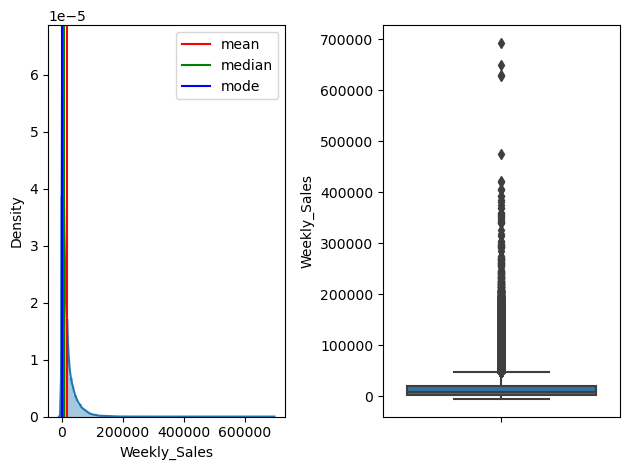

skew : -0.3258497664635348
kurtosis : -1.206345903071735
mean : 136727.91573878596
median : 140167.0
number of outliers :  0


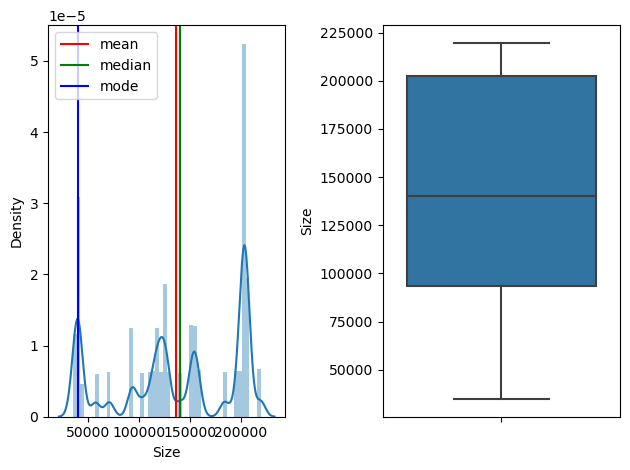

skew : -0.321404151969982
kurtosis : -0.6359219777925134
mean : 60.090058732813056
median : 62.09
number of outliers :  69


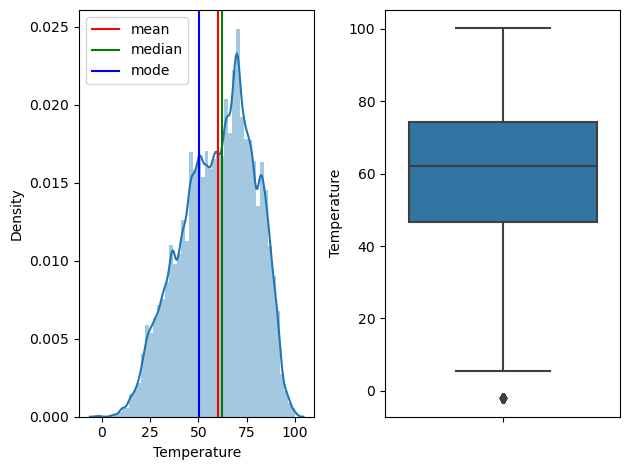

skew : -0.1049014956284031
kurtosis : -1.1854045046191282
mean : 3.361026527029273
median : 3.452
number of outliers :  0


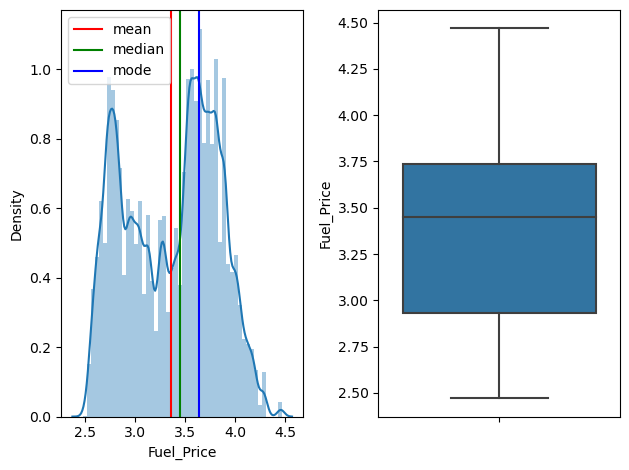

skew : 4.731304105937836
kurtosis : 34.91723635483528
mean : 2590.074819223418
median : 0.0
number of outliers :  55789


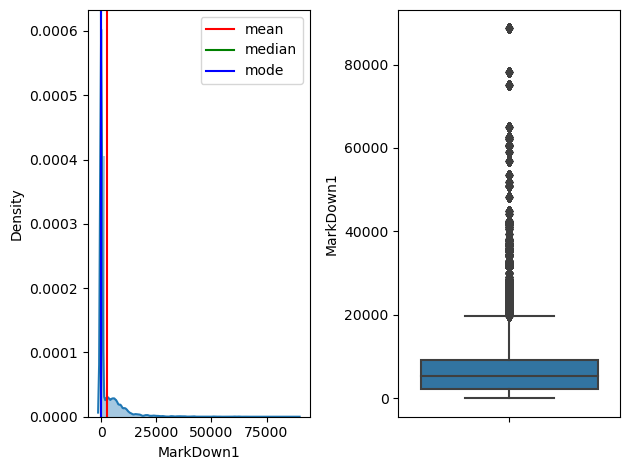

skew : 10.64595630692463
kurtosis : 145.42129311587385
mean : 879.9742980761794
median : 0.0
number of outliers :  103148


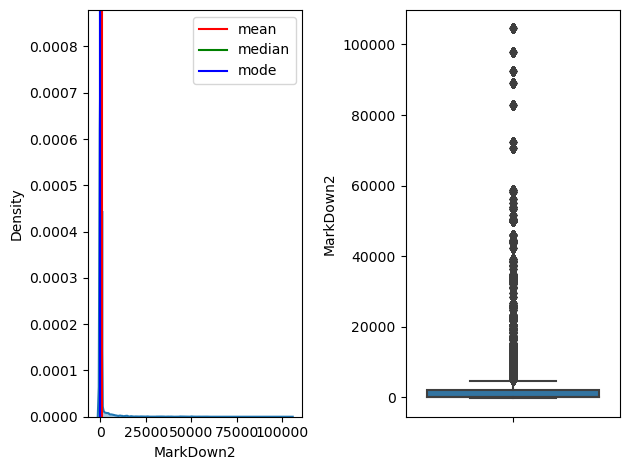

skew : 14.92234105657218
kurtosis : 248.09537056975668
mean : 468.08766510902217
median : 0.0
number of outliers :  84674


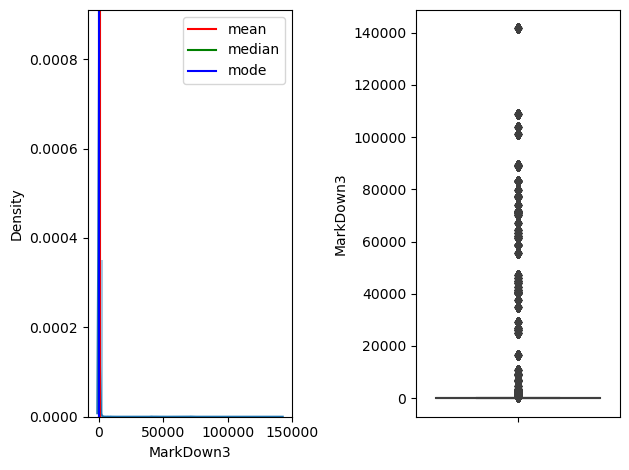

skew : 8.077666469546449
kurtosis : 86.24233932886966
mean : 1083.13226752391
median : 0.0
number of outliers :  79134


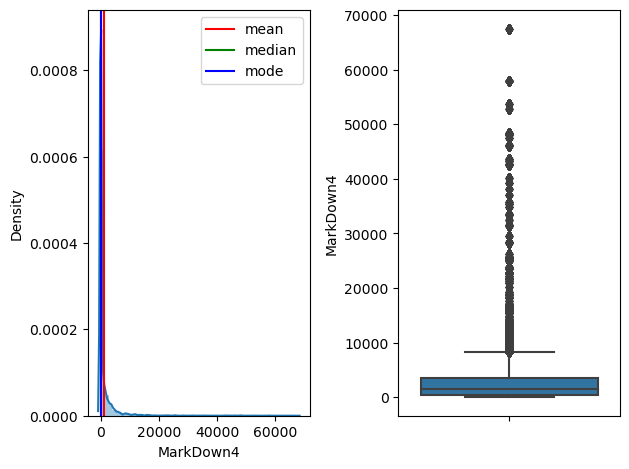

skew : 9.964519133631532
kurtosis : 183.40806548607708
mean : 1662.7723846335969
median : 0.0
number of outliers :  40458


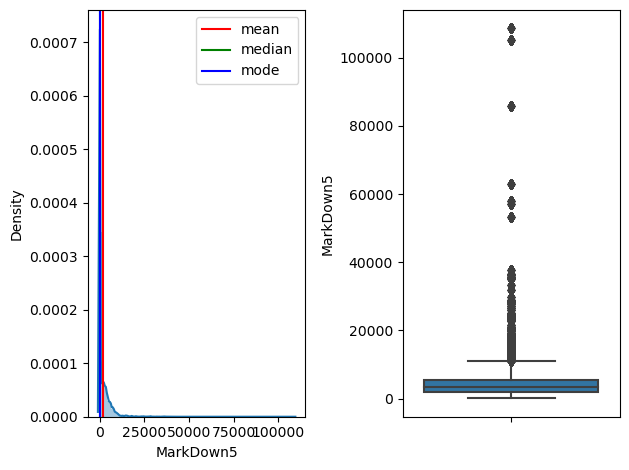

skew : 0.0852192847326045
kurtosis : -1.8297143643268134
mean : 171.20194682296707
median : 182.3187801
number of outliers :  0


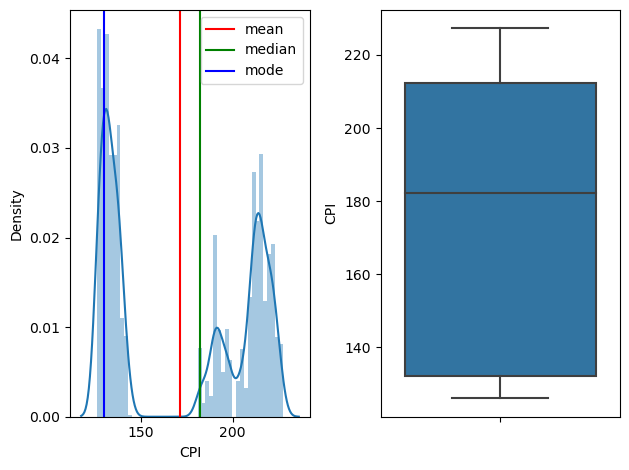

skew : 1.1837425684974345
kurtosis : 2.7312166296417724
mean : 7.960288694641783
median : 7.866
number of outliers :  32114


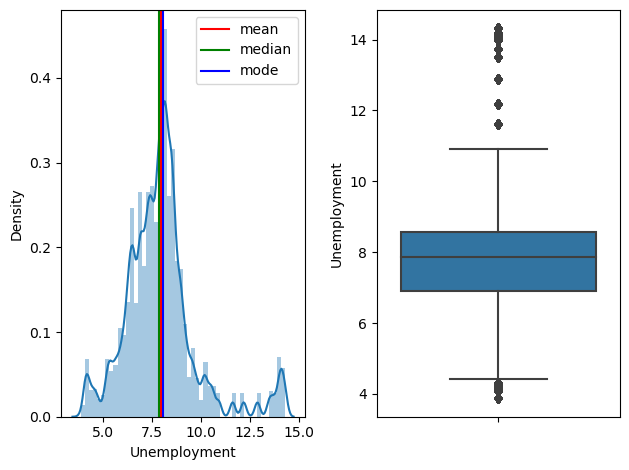

In [21]:
for i in df1.select_dtypes(include='number').drop(columns = ['Store','Dept']).columns:
    print('skew :', df1[i].skew())
    print('kurtosis :',  df1[i].kurt())
    print('mean :',df1[i].mean() )
    print('median :',df1[i].median() )
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3-q1
    ll = max(df1[i].min(),q1 -1.5*iqr)
    ul = min(df1[i].max(),q3 +1.5*iqr)
    out = df1[(df1[i] < ll )| (df1[i] > ul)].shape[0]
    print('number of outliers : ' ,out)
    plt.subplot(1,2,1)
    sns.distplot(df1[i])
    plt.axvline(df1[i].mean(),label = 'mean',color ='r')
    plt.axvline(df1[i].median(),label = 'median',color ='g')
    plt.axvline(df1[i].mode()[0],label = 'mode',color ='blue')
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(y = df[i])
    plt.tight_layout()
    plt.show()
    

all the numerical features have skewness due to presence outliers 

since we are trying to predict the weekly sales  we will keep the outliers there itself not to disrupt the pattern

the outliers are mainly evident in markdown where we used zeroes for null values

The Size feature is multimodal, we can size the peaks for a particular set of sizes

we need to convert the date feature to corresponding week number to get a more clear idea

we can observe in the fuel price column that its multimodal it maybe due to the variance in region or due to date

### for categorical columns

In [22]:
df1['Type'].value_counts().index


Index(['A', 'B', 'C'], dtype='object')

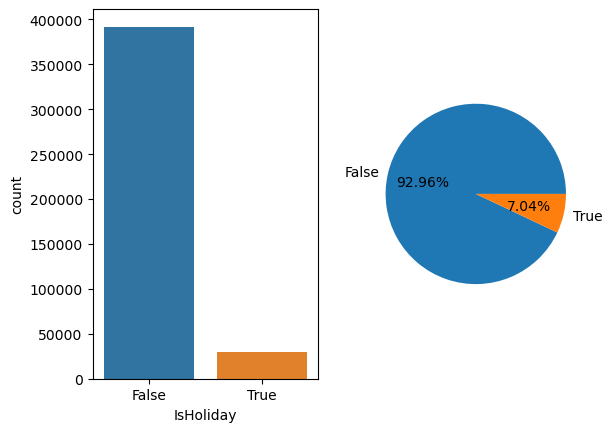

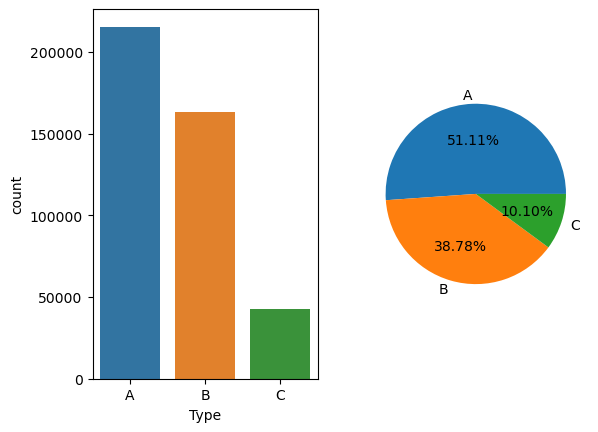

In [23]:
for i in ['IsHoliday','Type']:
    plt.subplot(1,2,1)
    sns.countplot(df1[i])
    plt.subplot(1,2,2)
    plt.pie(x= df1[i].value_counts(), labels= df1[i].value_counts().index,autopct = '%0.2f%%')
    plt.show()

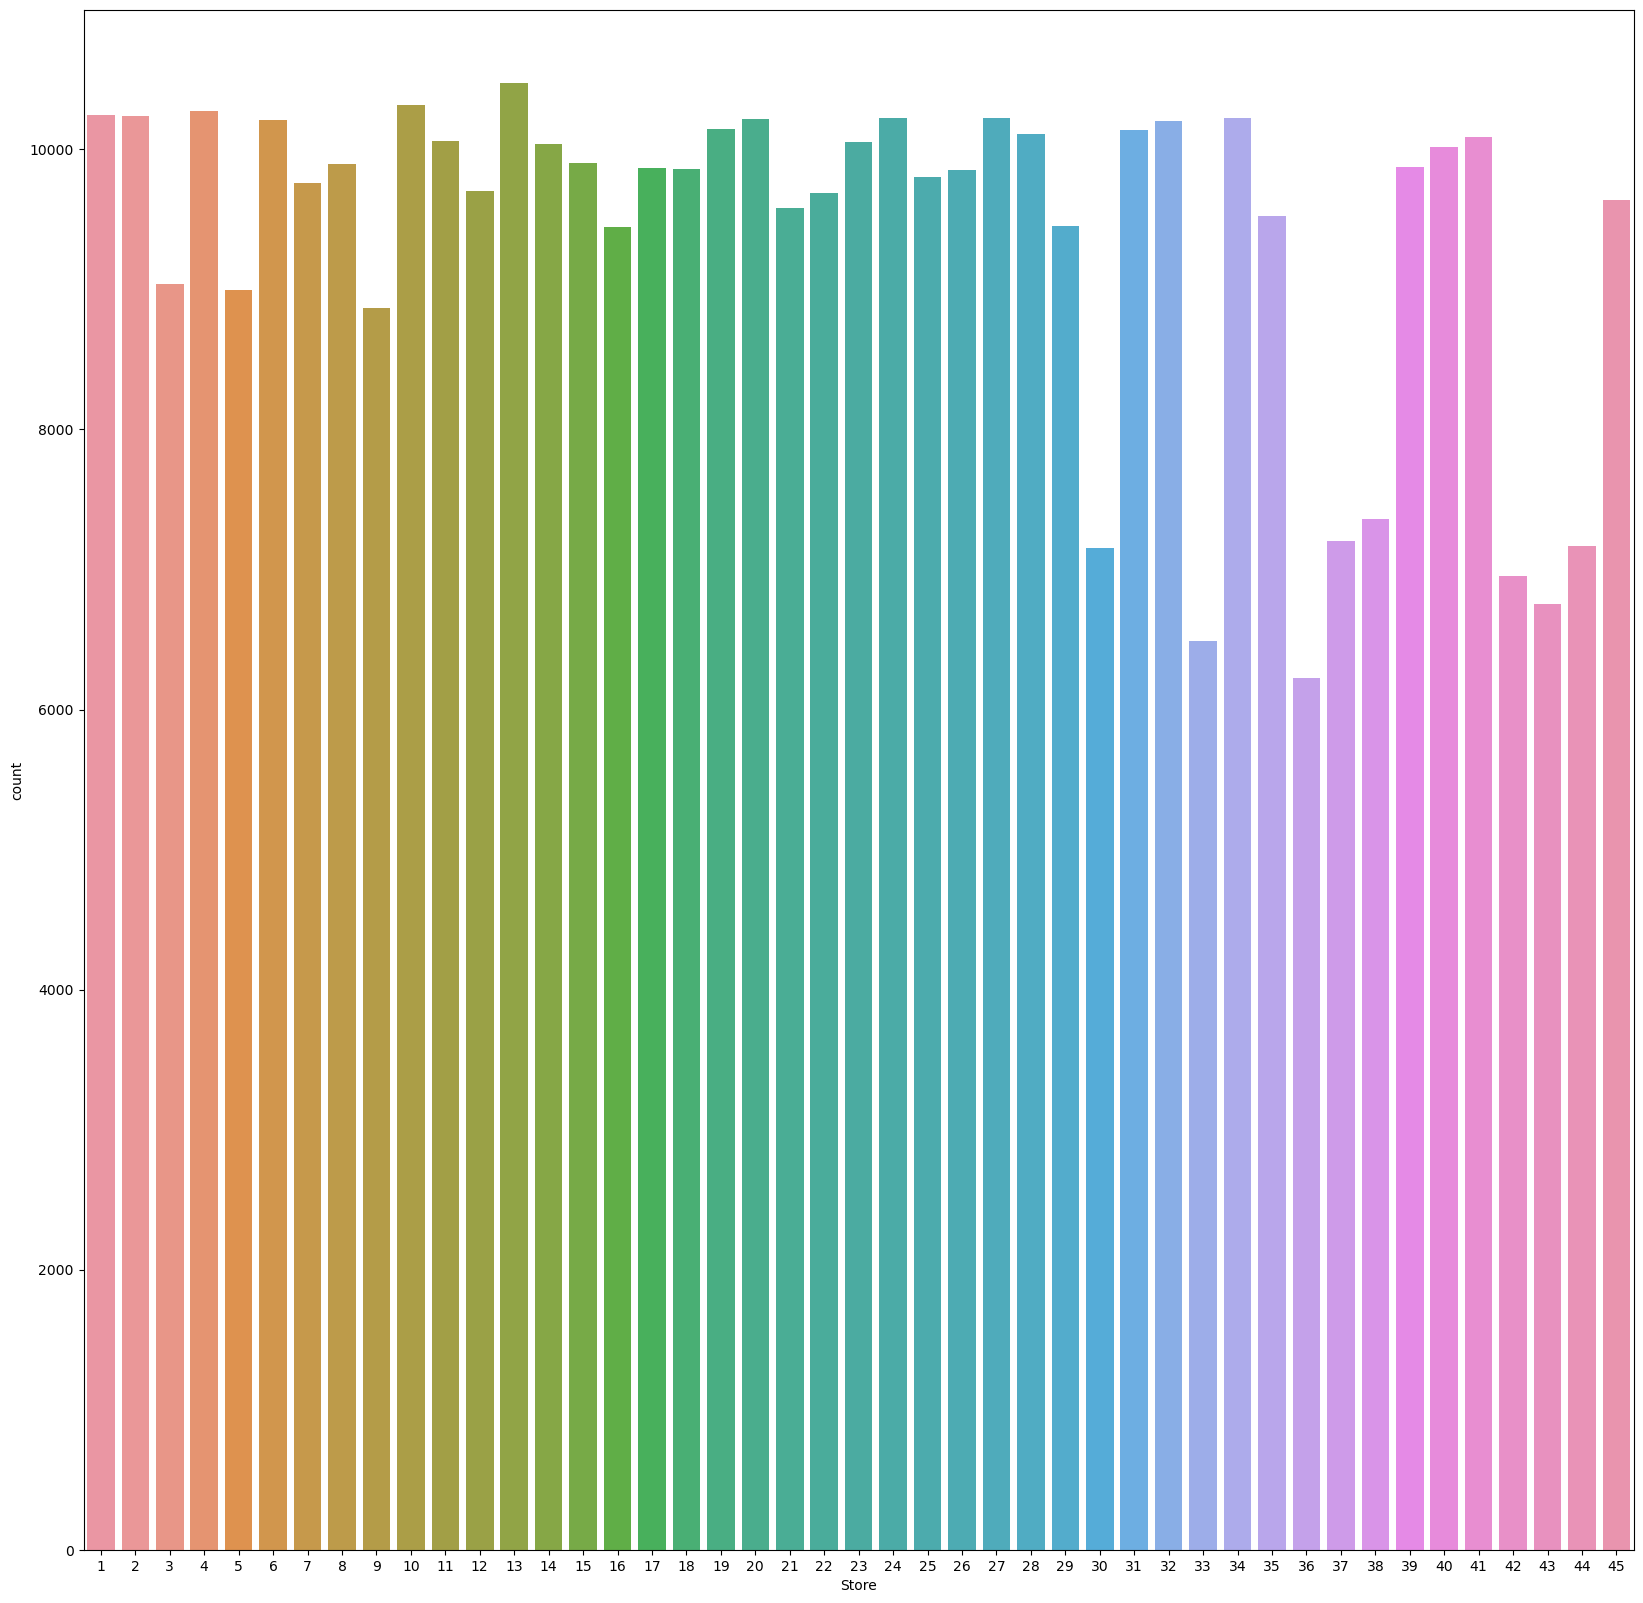

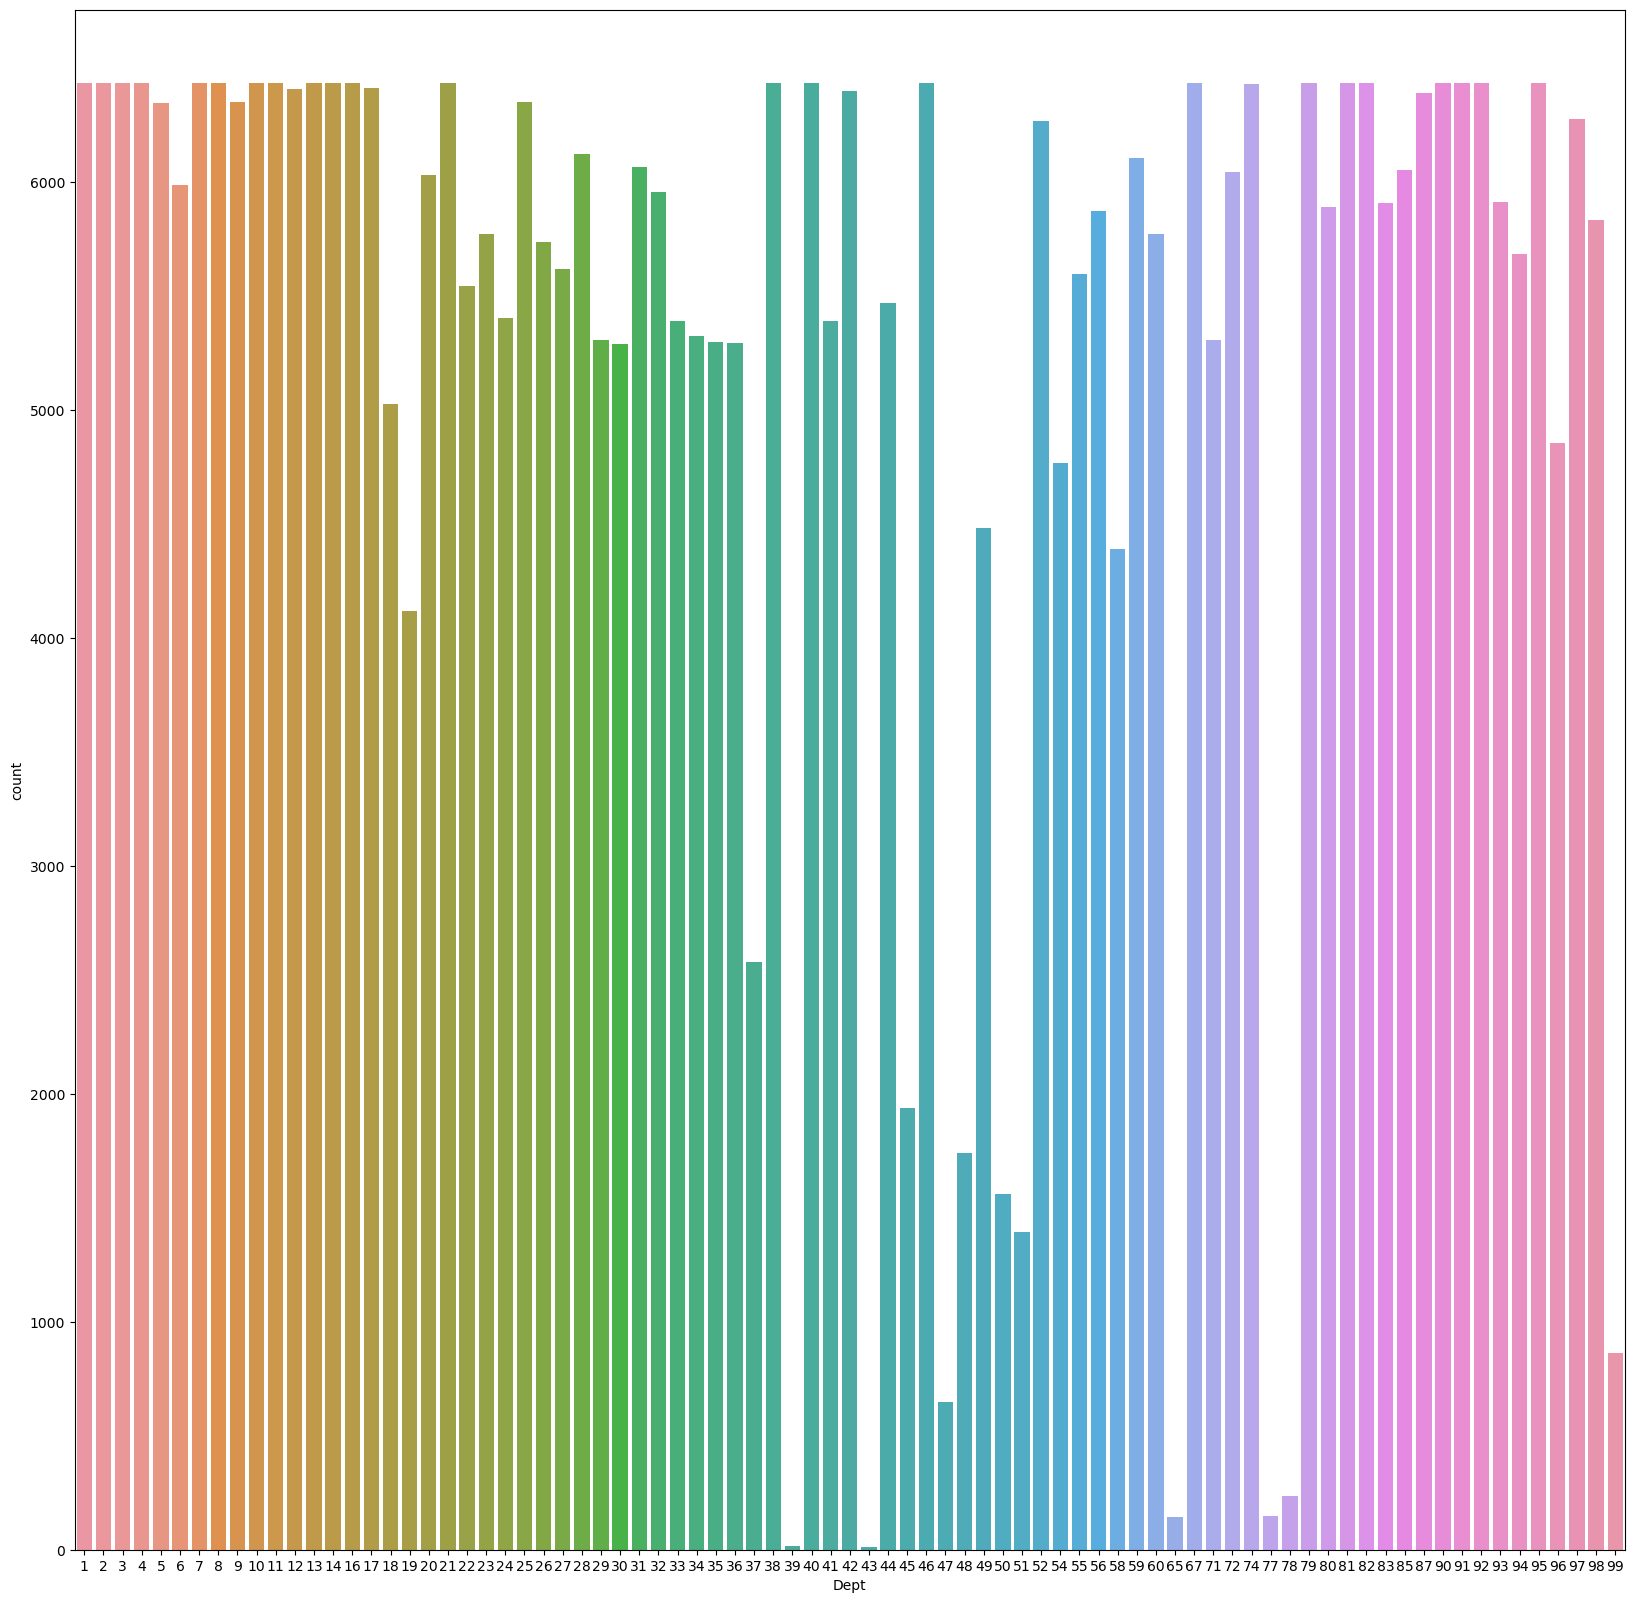

In [24]:
for i in ['Store','Dept']:
    plt.figure(figsize=(20,20))


    sns.countplot(df1[i])
    plt.show()

### We can see the count of records for store and department
### but we dont whether the departments in the stores are same 

All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Before going into bi variate analysis we will  make year,month,week

In [25]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Week'] = df1['Date'].dt.week

In [26]:
#here the week values are in  repetative fashion 1 to 52 for 3 years

In [27]:
df1['Week'].nunique()

52

In [28]:
df1['Month'].nunique()

12

In [29]:
df1['Year'].nunique()

3

In [30]:
df1.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     2 2010-02-05      50605.27      False    A  151315        42.31   
2      1     3 2010-02-05      13740.12      False    A  151315        42.31   
3      1     4 2010-02-05      39954.04      False    A  151315        42.31   
4      1     5 2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      2     5  
1  211.096358         8.106  2010      2     5  
2  211.096358         8.106  2010      2     5  
3  211.096358         8.106  2010      2     5  
4  211.096358         8.106  2010      2     5

In [31]:
# numerical vs numerical
num_cols = df1.select_dtypes(include='number').drop(columns=['Store','Weekly_Sales','Dept']).columns

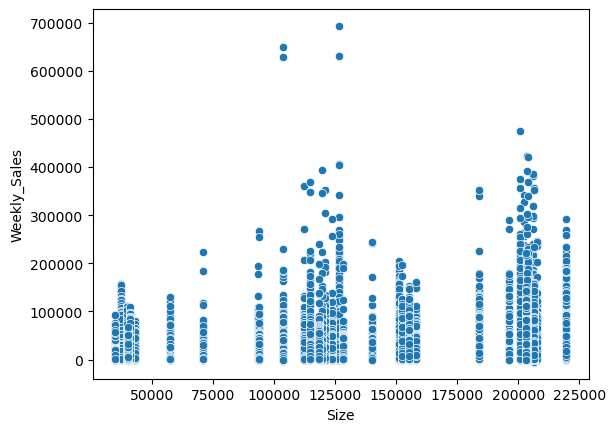

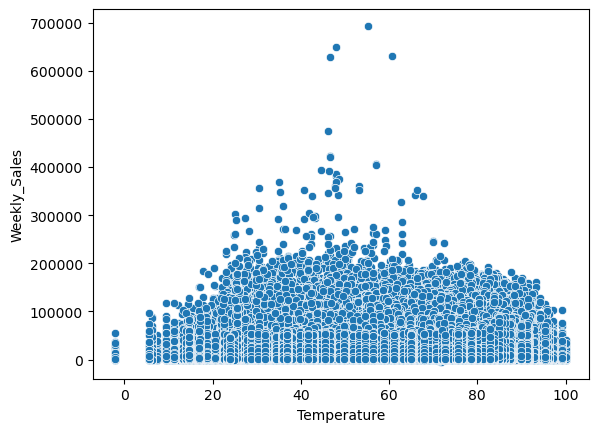

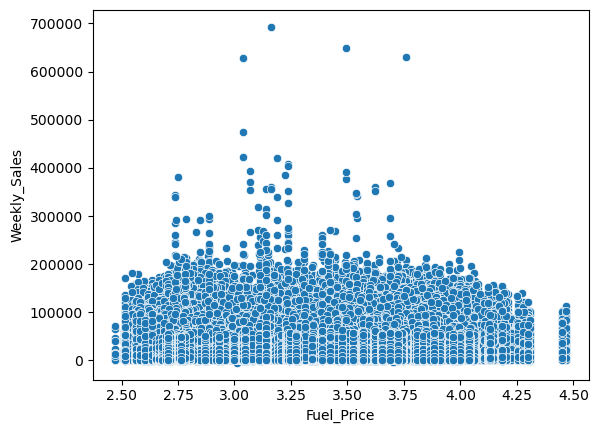

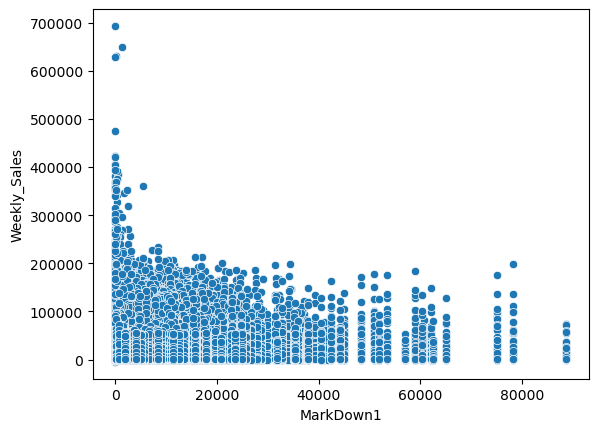

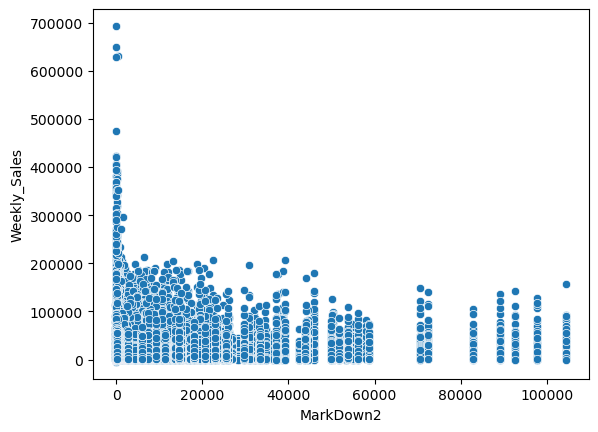

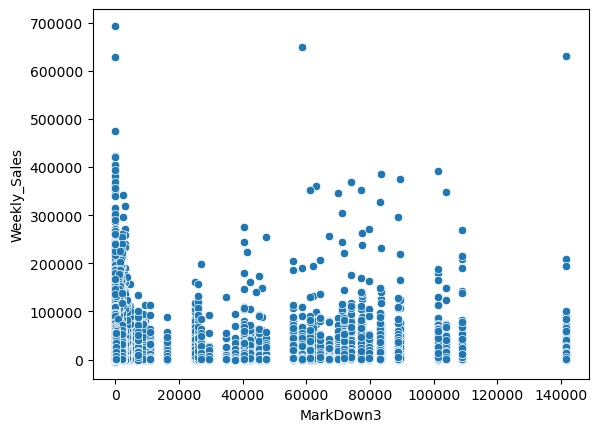

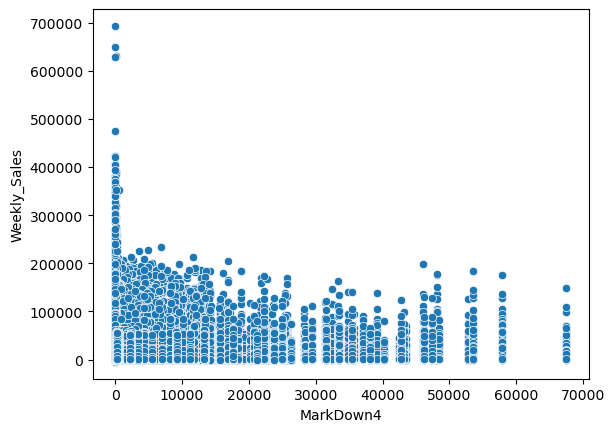

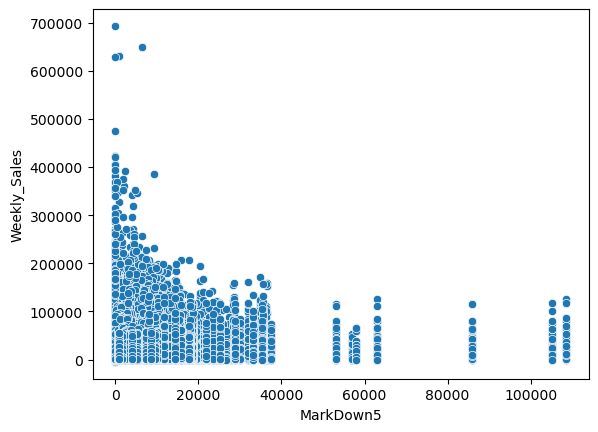

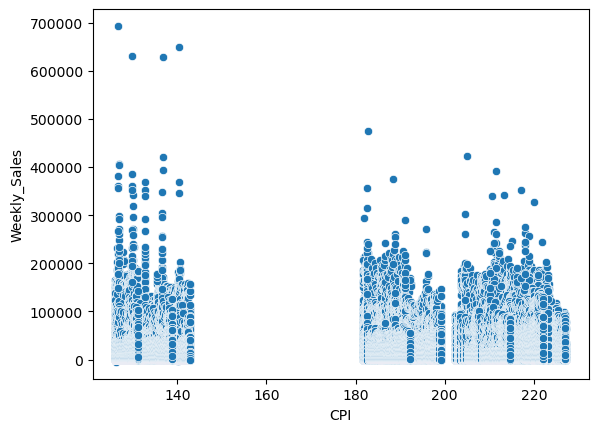

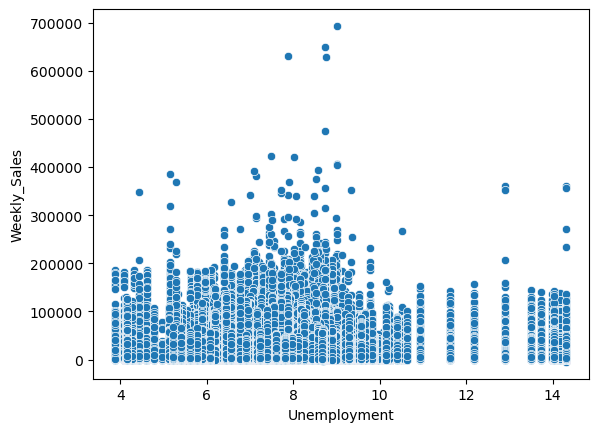

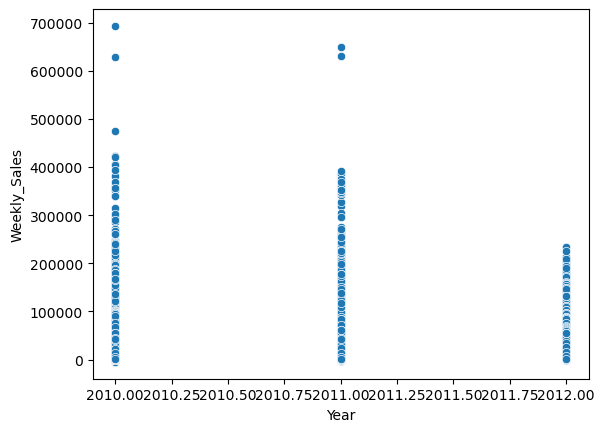

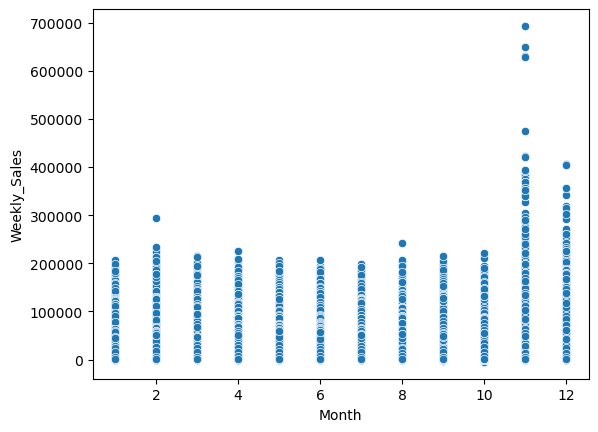

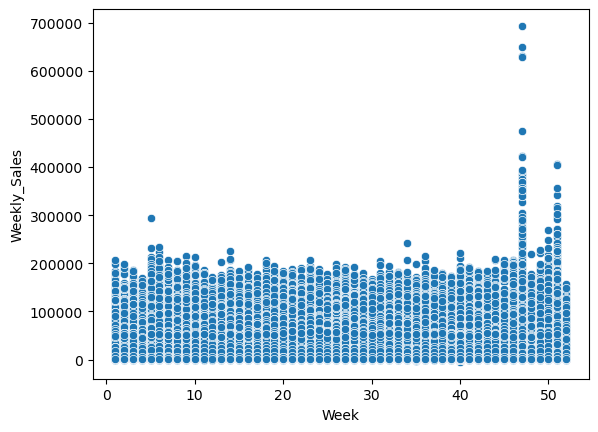

In [32]:
for i in num_cols:
    sns.scatterplot(df1[i],df1['Weekly_Sales'])
    plt.show()

In [33]:
#not much patterns are obtianed from these scatterplots
# the values are missing at cpi,11th and 12th month has maximimum sales shows a pattern

In [34]:
df1

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     2 2010-02-05      50605.27      False    A  151315   
2           1     3 2010-02-05      13740.12      False    A  151315   
3           1     4 2010-02-05      39954.04      False    A  151315   
4           1     5 2010-02-05      32229.38      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    93 2012-10-26       2487.80      False    B  118221   
421566     45    94 2012-10-26       5203.31      False    B  118221   
421567     45    95 2012-10-26      56017.47      False    B  118221   
421568     45    97 2012-10-26       6817.48      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00        0.0       0.00   
1             42.31       2.572       0.00       0.00        0.0       0.00   
2             42.31       2.572       0.00       0.00        0.0       0.00   
3             42.31       2.572       0.00       0.00        0.0       0.00   
4             42.31       2.572       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Week  
0            0.00  211.096358         8.106  2010      2     5  
1            0.00  211.096358         8.106  2010      2     5  
2            0.00  211.096358         8.106  2010      2     5  
3            0.00  211.096358         8.106  2010      2     5  
4            0.00  211.096358         8.106  2010      2     5  
...           ...         ...           ...   ...    ...   ...  
421565     858.33  192.308899         8.667  2012     10    43  
421566     858.33  192.308899         8.667  2012     10    43  
421567     858.33  192.308899         8.667  2012     10    43  
421568     858.33  192.308899         8.667  2012     10    43  
421569     858.33  192.308899         8.667  2012     10    43  

[421570 rows x 19 columns]

In [35]:
df1['Type'].value_counts().index

Index(['A', 'B', 'C'], dtype='object')

In [36]:
df1['Store'].nunique()

45

In [37]:
df1.groupby('Type')['Store'].nunique()


Type
A    22
B    17
C     6
Name: Store, dtype: int64

<AxesSubplot:xlabel='Type'>

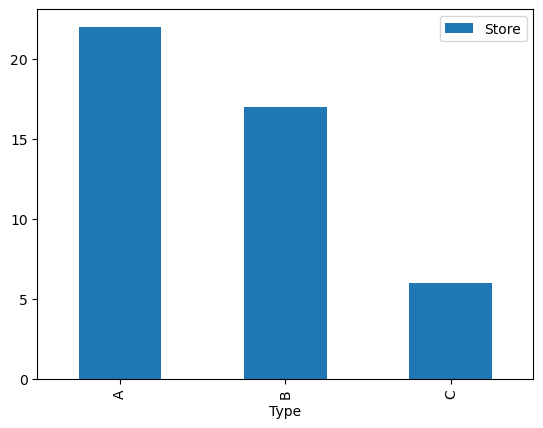

In [38]:
pd.pivot_table(data =df1 ,index = 'Type',values = 'Store',aggfunc='nunique').plot(kind ='bar')
#there are 22 shops of type A
# there are 17 type B
# there are 6 of type c

In [39]:
df1.head(1)

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05       24924.5      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      2     5

# cat vs num

In [40]:
#is holiday

<AxesSubplot:xlabel='IsHoliday'>

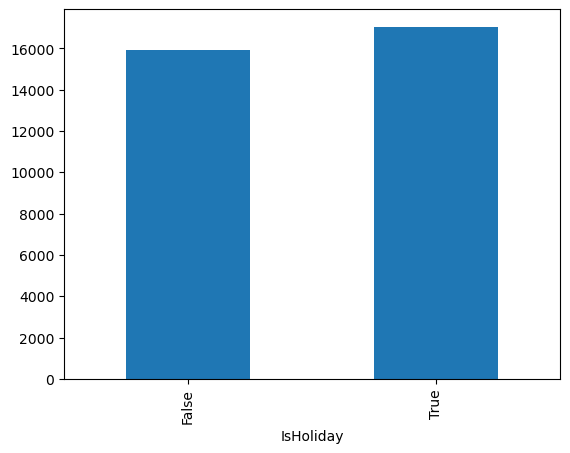

In [41]:
df.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind ='bar')

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

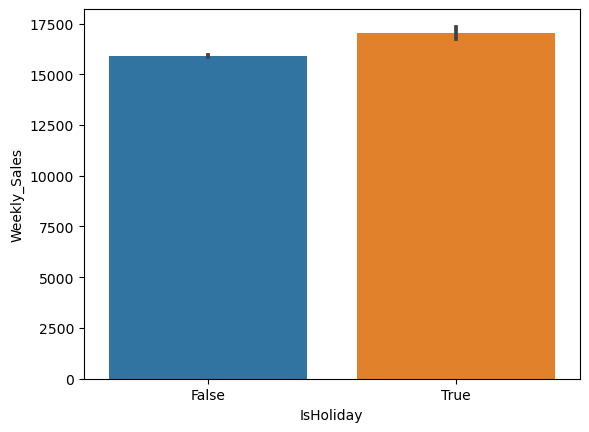

In [42]:
sns.barplot(df['IsHoliday'],df['Weekly_Sales'])

the avg sales is more on on holiday weeks

In [43]:
df1[df1['IsHoliday'] ==True]['Date'].unique()
#weeks containing these  days are considered as holiday weeks

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [44]:

target_superbowl =pd.to_datetime(['2011-02-11','2010-02-12','2012-02-10'])

In [45]:
df1['Super_Bowl'] = df1['Date'].apply(lambda x : True if x in target_superbowl  else False)

In [46]:
df1

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     2 2010-02-05      50605.27      False    A  151315   
2           1     3 2010-02-05      13740.12      False    A  151315   
3           1     4 2010-02-05      39954.04      False    A  151315   
4           1     5 2010-02-05      32229.38      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    93 2012-10-26       2487.80      False    B  118221   
421566     45    94 2012-10-26       5203.31      False    B  118221   
421567     45    95 2012-10-26      56017.47      False    B  118221   
421568     45    97 2012-10-26       6817.48      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00        0.0       0.00   
1             42.31       2.572       0.00       0.00        0.0       0.00   
2             42.31       2.572       0.00       0.00        0.0       0.00   
3             42.31       2.572       0.00       0.00        0.0       0.00   
4             42.31       2.572       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Week  Super_Bowl  
0            0.00  211.096358         8.106  2010      2     5       False  
1            0.00  211.096358         8.106  2010      2     5       False  
2            0.00  211.096358         8.106  2010      2     5       False  
3            0.00  211.096358         8.106  2010      2     5       False  
4            0.00  211.096358         8.106  2010      2     5       False  
...           ...         ...           ...   ...    ...   ...         ...  
421565     858.33  192.308899         8.667  2012     10    43       False  
421566     858.33  192.308899         8.667  2012     10    43       False  
421567     858.33  192.308899         8.667  2012     10    43       False  
421568     858.33  192.308899         8.667  2012     10    43       False  
421569     858.33  192.308899         8.667  2012     10    43       False  

[421570 rows x 20 columns]

In [47]:
target_labour =pd.to_datetime(['2010-09-10','2012-09-07','2011-09-09'])
df1['Labour_Day'] = df1['Date'].apply(lambda x : True if x in target_labour  else False)

In [48]:
target_Thanksgiving =pd.to_datetime(['2010-11-26','2011-11-25'])
df1['Thanksgiving'] = df1['Date'].apply(lambda x : True if x in target_Thanksgiving  else False)

In [49]:
target_christmas =pd.to_datetime(['2010-12-31','2011-12-30'])
df1['Christmas'] = df1['Date'].apply(lambda x : True if x in target_christmas  else False)

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

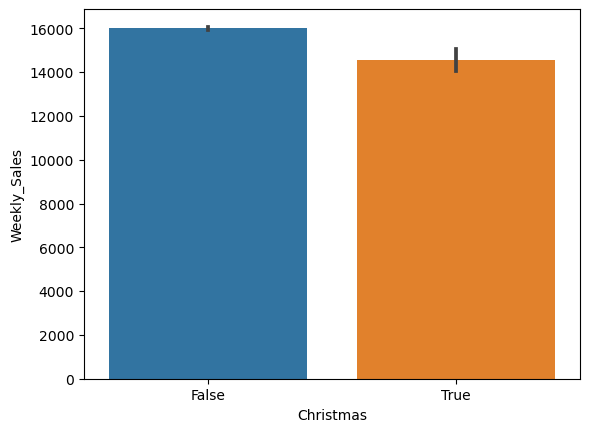

In [50]:
sns.barplot(df1['Christmas'],df1['Weekly_Sales'])

<AxesSubplot:xlabel='Labour_Day', ylabel='Weekly_Sales'>

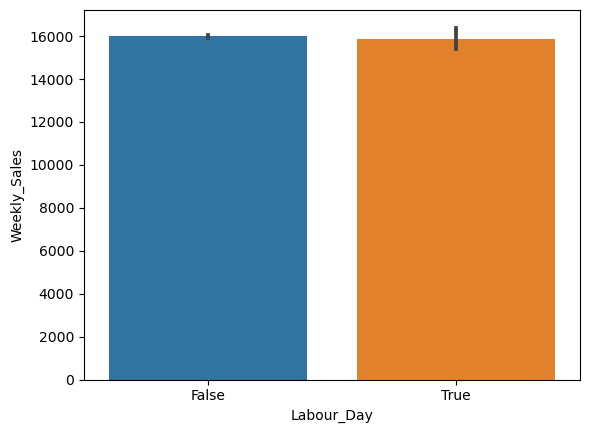

In [51]:
sns.barplot(df1['Labour_Day'],df1['Weekly_Sales'])

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

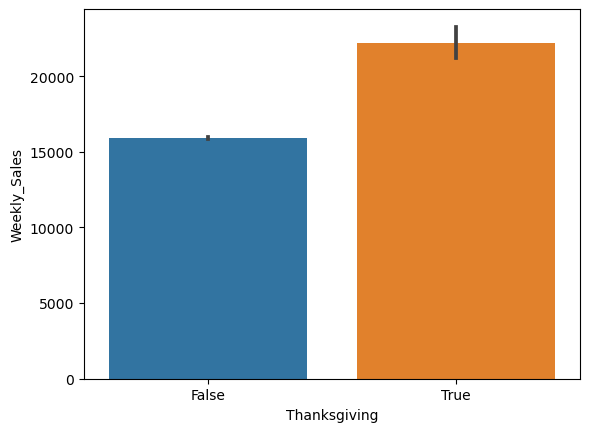

In [52]:
sns.barplot(df1['Thanksgiving'],df1['Weekly_Sales'])

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

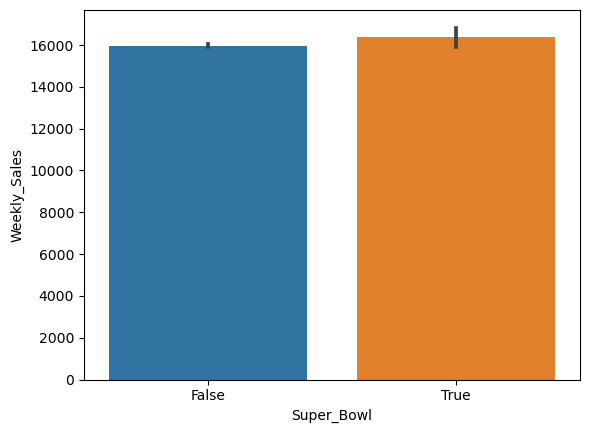

In [53]:
sns.barplot(df1['Super_Bowl'],df1['Weekly_Sales'])

thanksgiving have high avg sales compared to non holiday weeks (may be last miniute shopping)

for labour day and superbowl the difference is not much 
 christmas week also shows similar pattern may people shop one or two weeks before christmas


In [54]:
df1.groupby('Super_Bowl')['Weekly_Sales'].mean()

Super_Bowl
False    15972.706631
True     16377.996441
Name: Weekly_Sales, dtype: float64

In [55]:
df1.groupby('Christmas')['Weekly_Sales'].mean()

Christmas
False    16001.828593
True     14543.387158
Name: Weekly_Sales, dtype: float64

In [56]:
df1.groupby('Thanksgiving')['Weekly_Sales'].mean()

Thanksgiving
False    15891.793958
True     22220.944538
Name: Weekly_Sales, dtype: float64

In [57]:
df1.groupby('Labour_Day')['Weekly_Sales'].mean()

Labour_Day
False    15983.395813
True     15881.693339
Name: Weekly_Sales, dtype: float64

In [58]:
df1.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     2 2010-02-05      50605.27      False    A  151315        42.31   
2      1     3 2010-02-05      13740.12      False    A  151315        42.31   
3      1     4 2010-02-05      39954.04      False    A  151315        42.31   
4      1     5 2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Year  Month  Week  Super_Bowl  Labour_Day  \
0  211.096358         8.106  2010      2     5       False       False   
1  211.096358         8.106  2010      2     5       False       False   
2  211.096358         8.106  2010      2     5       False       False   
3  211.096358         8.106  2010      2     5       False       False   
4  211.096358         8.106  2010      2     5       False       False   

   Thanksgiving  Christmas  
0         False      False  
1         False      False  
2         False      False  
3         False      False  
4         False      False

In [59]:
#now we will check the impact of the size of the store with sales
df1.groupby(['Type'])['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Type'>

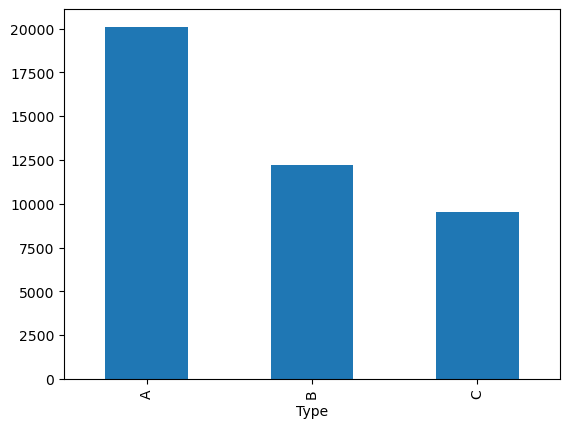

In [60]:
df1.groupby(['Type'])['Weekly_Sales'].mean().plot(kind ='bar')
#sales are more at type a stores

In [61]:
df1.groupby(['Type','IsHoliday'])['Weekly_Sales'].mean()
#there is only slight increase in sales for Holiday or not

Type  IsHoliday
A     False        20008.746759
      True         21297.517824
B     False        12153.067752
      True         13346.164062
C     False         9518.528116
      True          9532.963131
Name: Weekly_Sales, dtype: float64

In [62]:
# test_ind for IS Holiday type A
salesA = df1[(df1['IsHoliday'] == True) & (df1['Type'] =='A') ]['Weekly_Sales']
salesB = df1[(df1['IsHoliday'] == False) & (df1['Type'] =='A') ]['Weekly_Sales']

In [63]:
from scipy.stats import shapiro,levene,ttest_ind,mannwhitneyu

In [64]:
shapiro(salesA),shapiro(salesB)
#not normal we will go for mannwhitneyu

(ShapiroResult(statistic=0.6503556966781616, pvalue=0.0),
 ShapiroResult(statistic=0.7203054428100586, pvalue=0.0))

In [65]:
mannwhitneyu(salesA,salesB)
#at 0.5 significance both are different

MannwhitneyuResult(statistic=1542101055.5, pvalue=0.0038210710239965375)

In [66]:
for i in ['Super_Bowl','Labour_Day','Thanksgiving','Christmas']:
    print(df1.groupby([i,'Type'])['Weekly_Sales'].mean())

Super_Bowl  Type
False       A       20088.683671
            B       12233.518469
            C        9506.055492
True        A       20603.690832
            B       12401.718198
            C       10156.204711
Name: Weekly_Sales, dtype: float64
Labour_Day  Type
False       A       20102.291095
            B       12241.858749
            C        9512.019024
True        A       19973.219881
            B       12013.482757
            C        9871.225746
Name: Weekly_Sales, dtype: float64
Thanksgiving  Type
False         A       19995.309014
              B       12144.563438
              C        9517.272388
True          A       27370.728296
              B       18661.296519
              C        9679.900152
Name: Weekly_Sales, dtype: float64
Christmas  Type
False      A       20126.297990
           B       12249.152357
           C        9541.691864
True       A       18231.031306
           B       11394.051524
           C        7963.228980
Name: Weekly_Sales, dtype: f

In [67]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

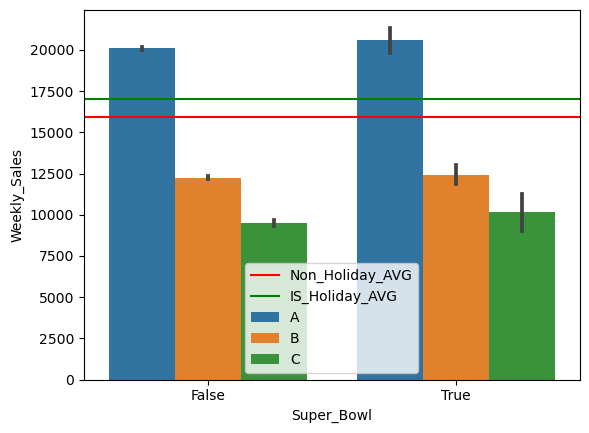

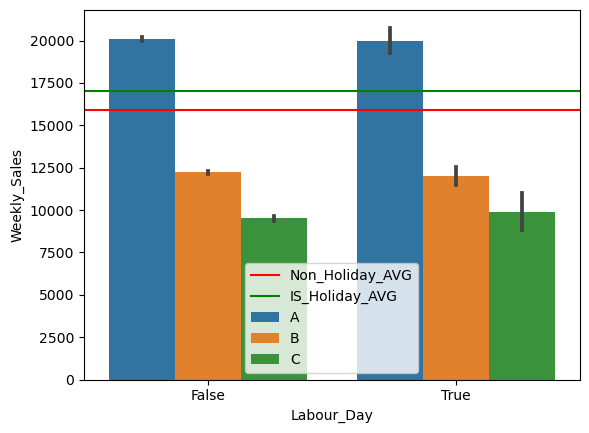

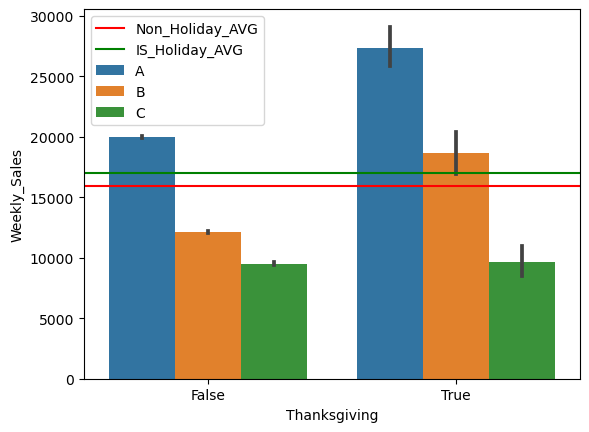

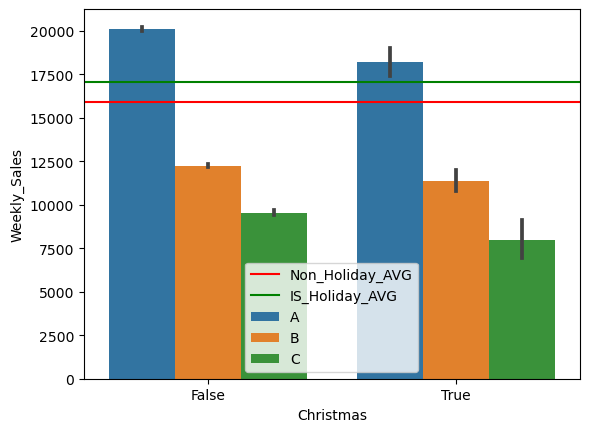

In [68]:
for i in ['Super_Bowl','Labour_Day','Thanksgiving','Christmas']:

    sns.barplot(data=df1, x=i, y='Weekly_Sales', hue='Type')
    plt.axhline(df.groupby('IsHoliday')['Weekly_Sales'].mean()[0],label ='Non_Holiday_AVG',color ='r')
    plt.axhline(df.groupby('IsHoliday')['Weekly_Sales'].mean()[1],label ='IS_Holiday_AVG',color ='g')
    plt.legend()
    plt.show()

it can be observed that type **A** stores are above avg in both non and is_holiday weeks

Also,Thanksgiving holiday has the highest average in across all holidays



# Size - Type Relation


<AxesSubplot:xlabel='Type', ylabel='Size'>

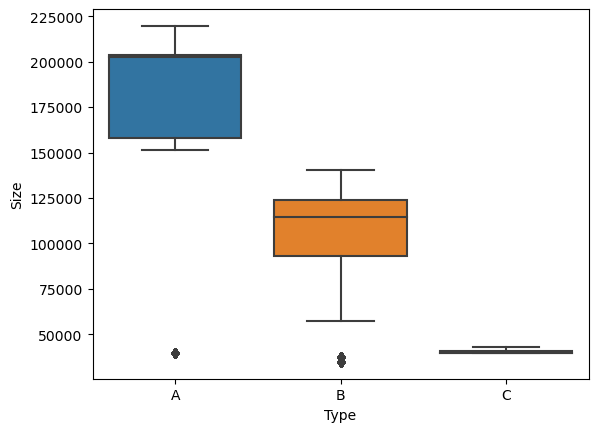

In [69]:
sns.boxplot(df1['Type'],df1['Size'])

In [70]:
# from the boxplot we can say that the Type is based on the Size of the feautre
#also sales is consistent with the size of the stores 
# we can observe few low  extreme outliers in Type A and Type B
# which looks like it might be an error caused during the data collection
# since stores of that sizes perfectly align to Type C and is far below from the mininum_size of Type_B 


In [71]:

typ_b = df1[df1['Type'] == "B"]['Size']
q1 = typ_b.quantile(0.25)
q3 = typ_b.quantile(0.75)
iqr = q3-q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr


In [72]:
df1[df1['Size'] < ll]['Type'].value_counts()

C    42597
B    18035
A    12709
Name: Type, dtype: int64

In [73]:
df1.groupby('Type')['Size'].min()

Type
A    39690
B    34875
C    39690
Name: Size, dtype: int64

In [74]:
df2 = df1.copy()

In [75]:
df2.loc[df2['Size'] < ll ,'Type']  = 'C'  
            

In [76]:
df2

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     2 2010-02-05      50605.27      False    A  151315   
2           1     3 2010-02-05      13740.12      False    A  151315   
3           1     4 2010-02-05      39954.04      False    A  151315   
4           1     5 2010-02-05      32229.38      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    93 2012-10-26       2487.80      False    B  118221   
421566     45    94 2012-10-26       5203.31      False    B  118221   
421567     45    95 2012-10-26      56017.47      False    B  118221   
421568     45    97 2012-10-26       6817.48      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00        0.0       0.00   
1             42.31       2.572       0.00       0.00        0.0       0.00   
2             42.31       2.572       0.00       0.00        0.0       0.00   
3             42.31       2.572       0.00       0.00        0.0       0.00   
4             42.31       2.572       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Week  Super_Bowl  \
0            0.00  211.096358         8.106  2010      2     5       False   
1            0.00  211.096358         8.106  2010      2     5       False   
2            0.00  211.096358         8.106  2010      2     5       False   
3            0.00  211.096358         8.106  2010      2     5       False   
4            0.00  211.096358         8.106  2010      2     5       False   
...           ...         ...           ...   ...    ...   ...         ...   
421565     858.33  192.308899         8.667  2012     10    43       False   
421566     858.33  192.308899         8.667  2012     10    43       False   
421567     858.33  192.308899         8.667  2012     10    43       False   
421568     858.33  192.308899         8.667  2012     10    43       False   
421569     858.33  192.308899         8.667  2012     10    43       False   

        Labour_Day  Thanksgiving  Christmas  
0            False         False      False  
1            False         False      False  
2            False         False      False  
3            False         False      False  
4            False         False      False  
...            ...           ...        ...  
421565       False         False      False  
421566       False         False      False  
421567       False         False      False  
421568       False         False      False  
421569       False         False      False  

[421570 rows x 23 columns]

<AxesSubplot:xlabel='Type', ylabel='Size'>

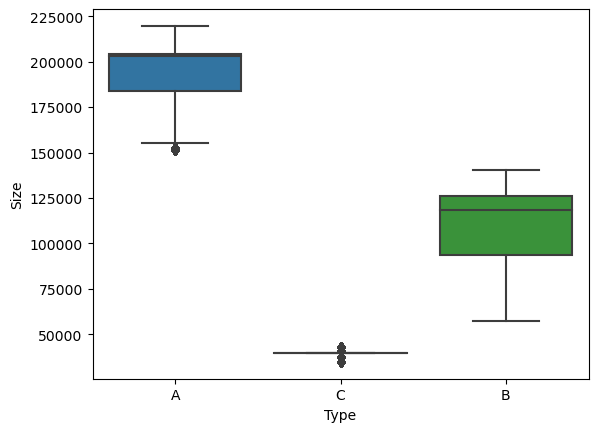

In [77]:
sns.boxplot(df2['Type'],df2['Size'])

In [78]:
df2.groupby('Type')['Size'].min()

Type
A    151315
B     57197
C     34875
Name: Size, dtype: int64

In [79]:
#after treating the outliers in type again checking for the relation
for i in ['Super_Bowl','Labour_Day','Thanksgiving','Christmas']:
    print(df1.groupby([i,'Type'])['Weekly_Sales'].mean())

Super_Bowl  Type
False       A       20088.683671
            B       12233.518469
            C        9506.055492
True        A       20603.690832
            B       12401.718198
            C       10156.204711
Name: Weekly_Sales, dtype: float64
Labour_Day  Type
False       A       20102.291095
            B       12241.858749
            C        9512.019024
True        A       19973.219881
            B       12013.482757
            C        9871.225746
Name: Weekly_Sales, dtype: float64
Thanksgiving  Type
False         A       19995.309014
              B       12144.563438
              C        9517.272388
True          A       27370.728296
              B       18661.296519
              C        9679.900152
Name: Weekly_Sales, dtype: float64
Christmas  Type
False      A       20126.297990
           B       12249.152357
           C        9541.691864
True       A       18231.031306
           B       11394.051524
           C        7963.228980
Name: Weekly_Sales, dtype: f

In [80]:
#the patterns have not changed much

In [81]:
df2.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     2 2010-02-05      50605.27      False    A  151315        42.31   
2      1     3 2010-02-05      13740.12      False    A  151315        42.31   
3      1     4 2010-02-05      39954.04      False    A  151315        42.31   
4      1     5 2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Year  Month  Week  Super_Bowl  Labour_Day  \
0  211.096358         8.106  2010      2     5       False       False   
1  211.096358         8.106  2010      2     5       False       False   
2  211.096358         8.106  2010      2     5       False       False   
3  211.096358         8.106  2010      2     5       False       False   
4  211.096358         8.106  2010      2     5       False       False   

   Thanksgiving  Christmas  
0         False      False  
1         False      False  
2         False      False  
3         False      False  
4         False      False

In [82]:
# we will check store wise avg sales
pd.pivot_table(data =df2,index = 'Store',columns =['IsHoliday'],values = 'Weekly_Sales').sort_values(by = True,ascending=False)
# pivot table shows the Weekly Sales  by Stores for holidays

IsHoliday         False          True
Store                                
20         29386.517928  31106.985906
4          29032.260570  30854.231417
14         28680.955485  30164.765263
10         26116.166656  29195.524157
2          26753.864227  28798.710526
13         27261.146969  28593.285602
27         24714.172533  26318.487872
6          21806.854728  23313.563481
1          21609.634733  23039.386667
39         20905.594997  22254.339742
19         20233.689681  22056.597678
31         19585.576618  20950.084218
23         19700.962434  20774.748494
28         18567.759341  20645.874372
11         19185.338530  20486.484936
24         18856.110105  20459.060347
41         17915.373396  18775.637918
18         15641.892529  16948.147261
32         16318.545633  16789.178285
12         14731.304140  16663.842167
35         13631.736739  16083.060734
22         15122.879886  15954.039059
26         14491.200754  15380.873013
34         13443.052068  14573.120126
40         13730.522084  14197.663028
17         12862.113716  14179.406237
8          13066.406406  14013.374425
43         13410.729834  13473.438093
21         11204.327405  12335.691179
45         11614.648240  12298.436956
42         11425.515827  11680.949753
25         10278.109377  10704.440550
37         10306.767529  10170.842685
15          8920.611276  10077.118659
7           8254.246774   9730.828726
9           8723.575683   9423.213136
29          8088.309482   9086.195943
30          8763.636535   8772.275241
16          7820.420632   8421.005141
36          8597.374014   8412.829062
38          7493.363637   7480.585843
3           6332.098604   6916.446288
44          6046.886331   5932.577174
33          5723.280870   5796.788499
5           5010.249172   5617.212609

In [83]:
pd.pivot_table(data =df2,index = 'Store',columns =['Super_Bowl','Labour_Day','Thanksgiving','Christmas'],values = 'Weekly_Sales')


Super_Bowl           False                                            \
Labour_Day           False                                      True   
Thanksgiving         False                        True         False   
Christmas            False          True         False         False   
Store                                                                  
1             21609.634733  19894.324514  27509.963931  21703.683226   
2             26753.864227  24997.662552  36365.017862  25515.844419   
3              6332.098604   6245.918425   8769.476797   6052.330798   
4             29032.260570  26402.601389  39686.108082  27908.552936   
5              5010.249172   4983.115846   7605.058626   5288.066000   
6             21806.854728  21264.795417  31369.888542  21004.078279   
7              8254.246774  11039.197143  12929.457464   8479.519903   
8             13066.406406  11658.276500  17834.693000  12741.188585   
9              8723.575683   8012.374683  12562.095476   8537.472162   
10            26116.166656  25263.809097  40343.459041  23718.108512   
11            19185.338530  17901.328440  25575.858085  17606.757256   
12            14731.304140  14623.175036  23139.839348  13700.077044   
13            27261.146969  24791.489184  38044.396351  26533.614429   
14            28680.955485  25270.466786  40050.439429  29712.372642   
15             8920.611276   8022.482238  15730.194388   8830.858317   
16             7820.420632   9262.525672   9885.943261   8246.398550   
17            12862.113716  10239.636594  16167.746667  17650.837805   
18            15641.892529  13464.322695  23413.788214  15080.554307   
19            20233.689681  18875.457746  27748.353916  21753.457944   
20            29386.517928  26321.799932  39707.411736  28322.702350   
21            11204.327405  11024.370075  18124.205956   9903.883166   
22            15122.879886  12918.554559  22630.363139  14269.452390   
23            19700.962434  16902.558865  29288.968652  19634.738143   
24            18856.110105  17865.091736  24758.826434  20640.960968   
25            10278.109377   9608.514044  15938.942857   9664.460531   
26            14491.200754  13215.019357  18220.948014  15503.938350   
27            24714.172533  21321.155862  35641.051806  26353.120372   
28            18567.759341  16507.658042  26852.581736  18900.672113   
29             8088.309482   7652.143383  13988.400741   7649.298209   
30             8763.636535   7822.307778   8969.571471   8510.989932   
31            19585.576618  17856.486364  26524.165804  18804.469349   
32            16318.545633  14094.736233  23210.521119  15343.731963   
33             5723.280870   4730.044130   5451.000440   6094.970580   
34            13443.052068  12969.597569  18310.844828  13329.402160   
35            13631.736739  11052.108955  26236.487910  14273.432687   
36             8597.374014   7349.271250   8241.144889   8129.026992   
37            10306.767529   9026.329802  10620.150612  10153.999671   
38             7493.363637   6042.767850   7699.731531   7949.832403   
39            20905.594997  19907.566331  31831.117730  20863.884444   
40            13730.522084  12286.938929  16639.963889  14378.276682   
41            17915.373396  15956.368451  26761.666099  17970.911495   
42            11425.515827   8922.887677  11340.155464  12603.384236   
43            13410.729834  10948.906842  13300.873061  14640.737050   
44             6046.886331   5214.999588   6230.055657   5961.063052   
45            11614.648240  11470.813556  17302.743382  10951.482549   

Super_Bowl            True  
Labour_Day           False  
Thanksgiving         False  
Christmas            False  
Store                       
1             23474.883871  
2             29535.363088  
3              6971.303368  
4             30825.640731  
5              5013.691340  
6             21622.972248  
7              7958.786570  
8             14276.536540  
9              9136.66

In [84]:
# it can be observed that for thanksgiving the stotre wise avg sales are high 

In [85]:
df2

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     2 2010-02-05      50605.27      False    A  151315   
2           1     3 2010-02-05      13740.12      False    A  151315   
3           1     4 2010-02-05      39954.04      False    A  151315   
4           1     5 2010-02-05      32229.38      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    93 2012-10-26       2487.80      False    B  118221   
421566     45    94 2012-10-26       5203.31      False    B  118221   
421567     45    95 2012-10-26      56017.47      False    B  118221   
421568     45    97 2012-10-26       6817.48      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00        0.0       0.00   
1             42.31       2.572       0.00       0.00        0.0       0.00   
2             42.31       2.572       0.00       0.00        0.0       0.00   
3             42.31       2.572       0.00       0.00        0.0       0.00   
4             42.31       2.572       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Week  Super_Bowl  \
0            0.00  211.096358         8.106  2010      2     5       False   
1            0.00  211.096358         8.106  2010      2     5       False   
2            0.00  211.096358         8.106  2010      2     5       False   
3            0.00  211.096358         8.106  2010      2     5       False   
4            0.00  211.096358         8.106  2010      2     5       False   
...           ...         ...           ...   ...    ...   ...         ...   
421565     858.33  192.308899         8.667  2012     10    43       False   
421566     858.33  192.308899         8.667  2012     10    43       False   
421567     858.33  192.308899         8.667  2012     10    43       False   
421568     858.33  192.308899         8.667  2012     10    43       False   
421569     858.33  192.308899         8.667  2012     10    43       False   

        Labour_Day  Thanksgiving  Christmas  
0            False         False      False  
1            False         False      False  
2            False         False      False  
3            False         False      False  
4            False         False      False  
...            ...           ...        ...  
421565       False         False      False  
421566       False         False      False  
421567       False         False      False  
421568       False         False      False  
421569       False         False      False  

[421570 rows x 23 columns]

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

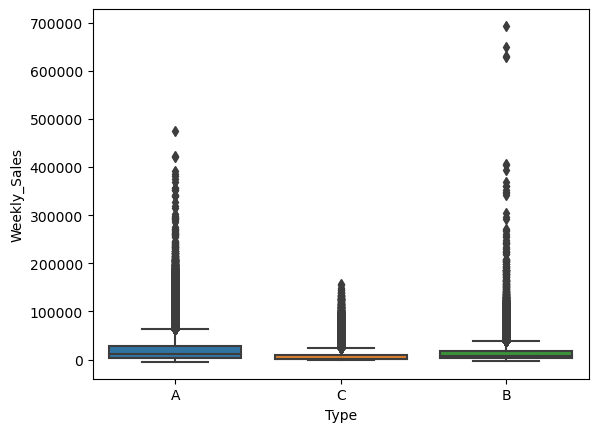

In [86]:
sns.boxplot(df2.Type,df2.Weekly_Sales)

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

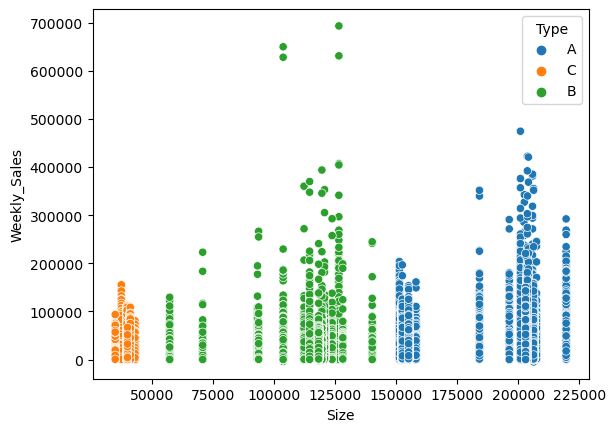

In [87]:
sns.scatterplot(df2.Size,df2.Weekly_Sales, hue= df2.Type)
#the avg sales are high in type A

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

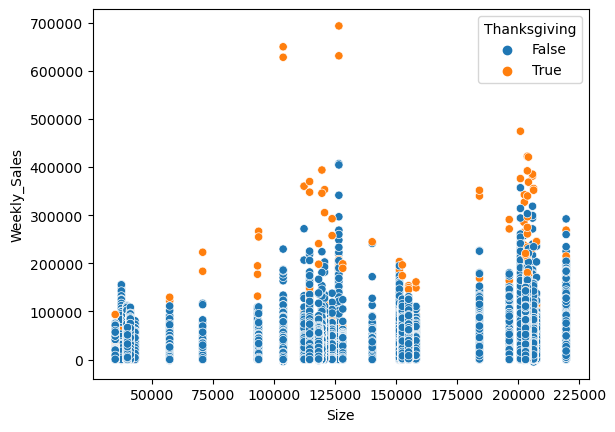

In [88]:
sns.scatterplot(df2.Size,df2.Weekly_Sales, hue= df2['Thanksgiving'])
#the avg sales are high in type 
#even though sales and size alone doesnot show 
# with respect to holidays the sales are high for higher sizes

In [89]:
df2.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000       2.933000       0.000000       0.000000   
50%        62.090000       3.452000       0.000000       0.000000   
75%        74.280000       3.738000    2809.050000       2.200000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4      MarkDown5            CPI  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean      468.087665    1083.132268    1662.772385     171.201947   
std      5528.873453    3894.529945    4207.629321      39.159276   
min       -29.100000       0.000000       0.000000     126.064000   
25%         0.000000       0.000000       0.000000     132.022667   
50%         0.000000       0.000000       0.000000     182.318780   
75%         4.540000     425.290000    2168.040000     212.416993   
max    141630.610000   67474.850000  108519.280000     227.232807   

        Unemployment           Year          Month           Week  
count  421570.000000  421570.000000  421570.000000  421570.000000  
mean        7.960289    2010.968591       6.449510      25.826762  
std         1.863296       0.796876       3.243217      14.151887  
min         3.879000    2010.000000       1.000000       1.000000  
25%         6.891000    2010.000000       4.000000      14.000000  
50%         7.866000    2011.000000       6.000000      26.000000  
75%         8.572000    2012.000000       9.000000      38.000000  
max        14.313000    2012.000000      12.000000      52.000000

In [90]:
## now we will look into sales much deeper to get insights 

<AxesSubplot:>

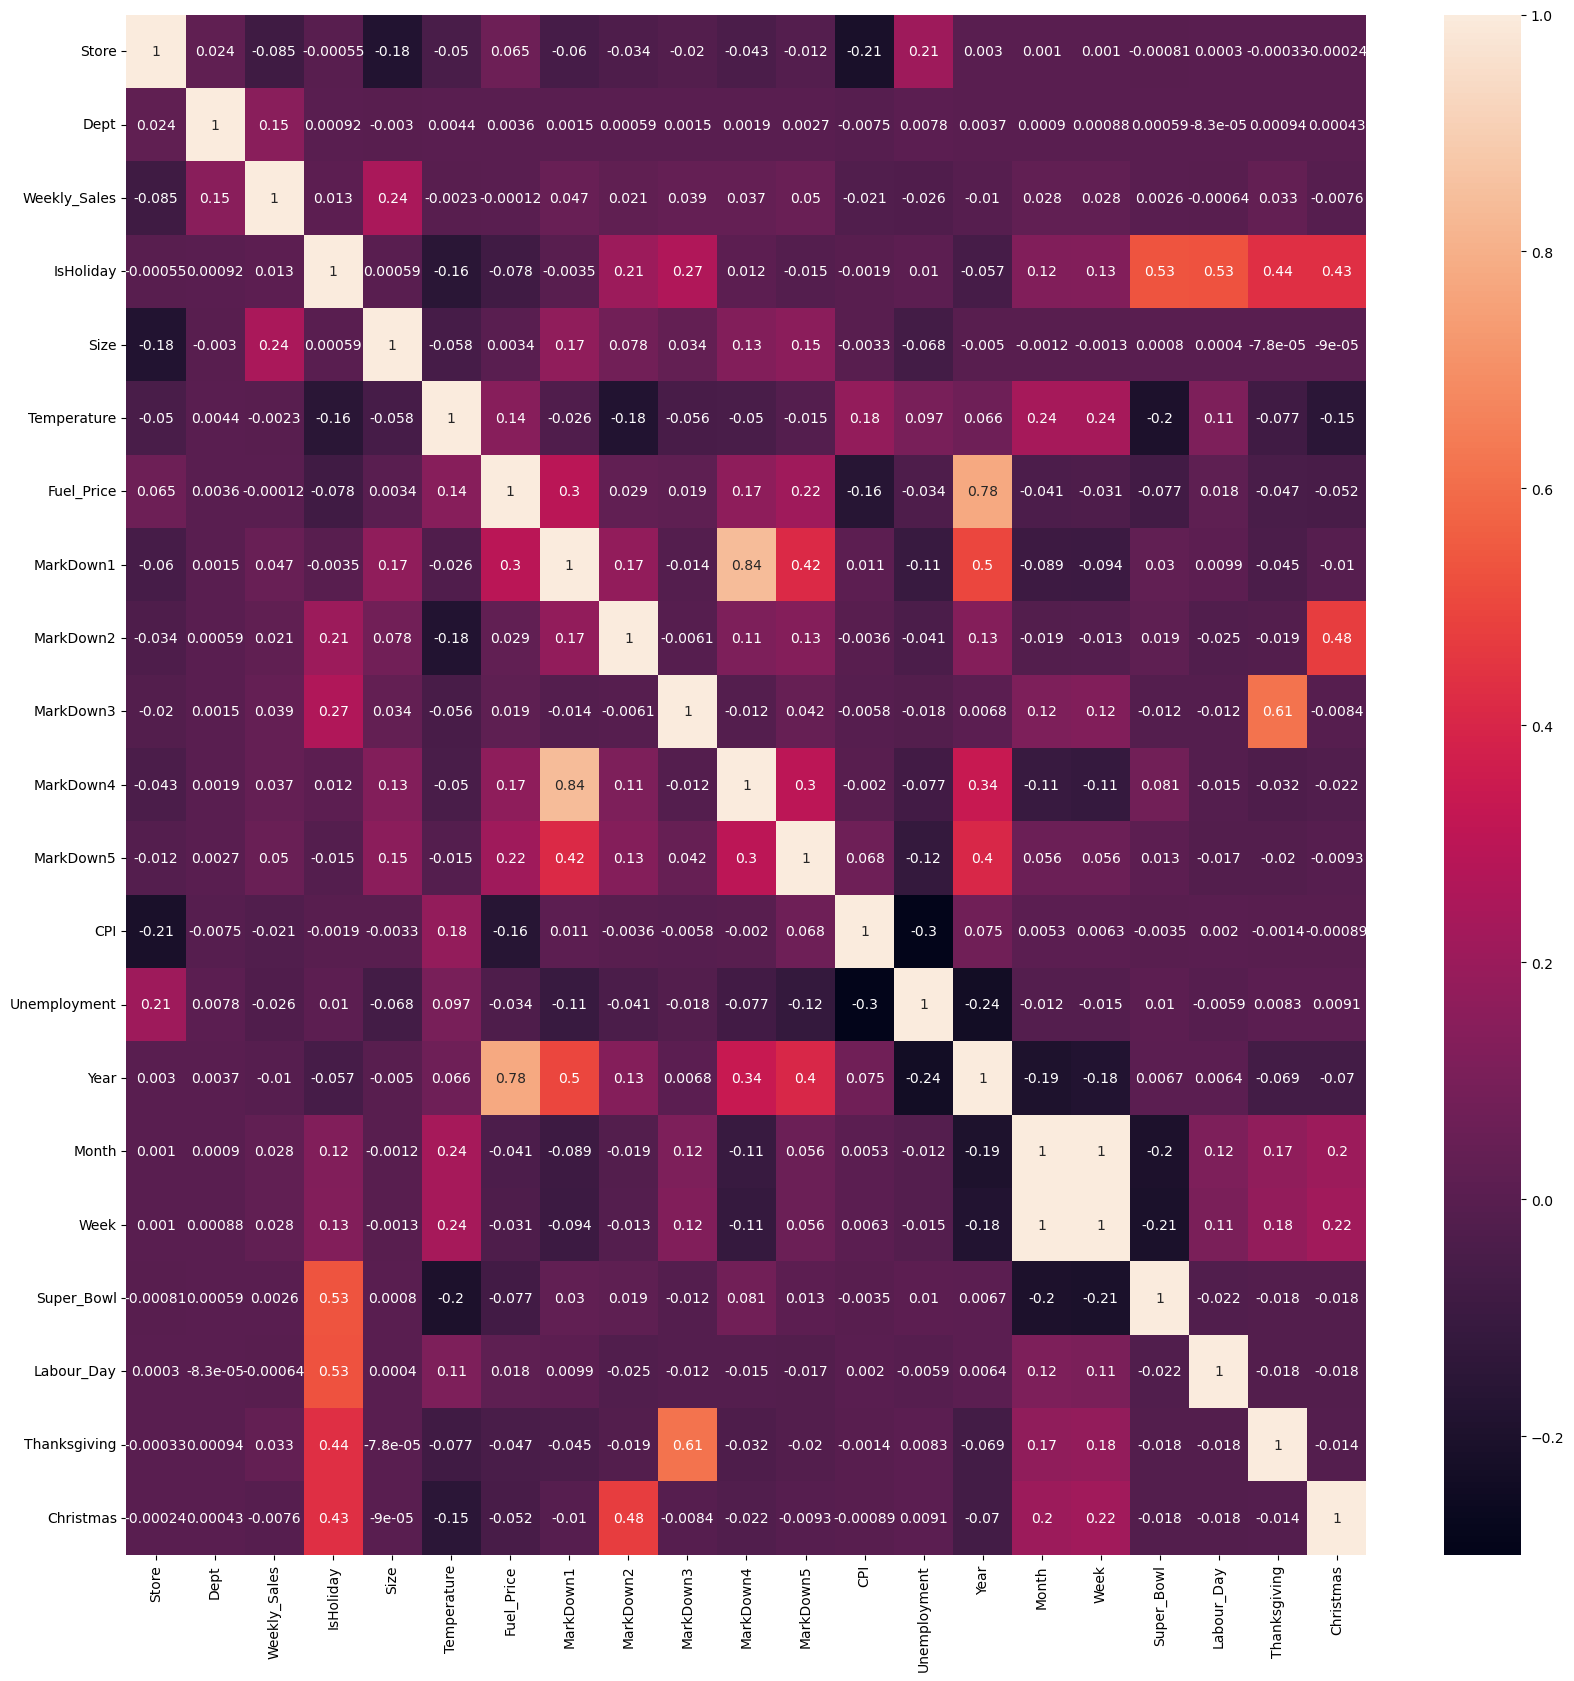

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot =True)

<AxesSubplot:>

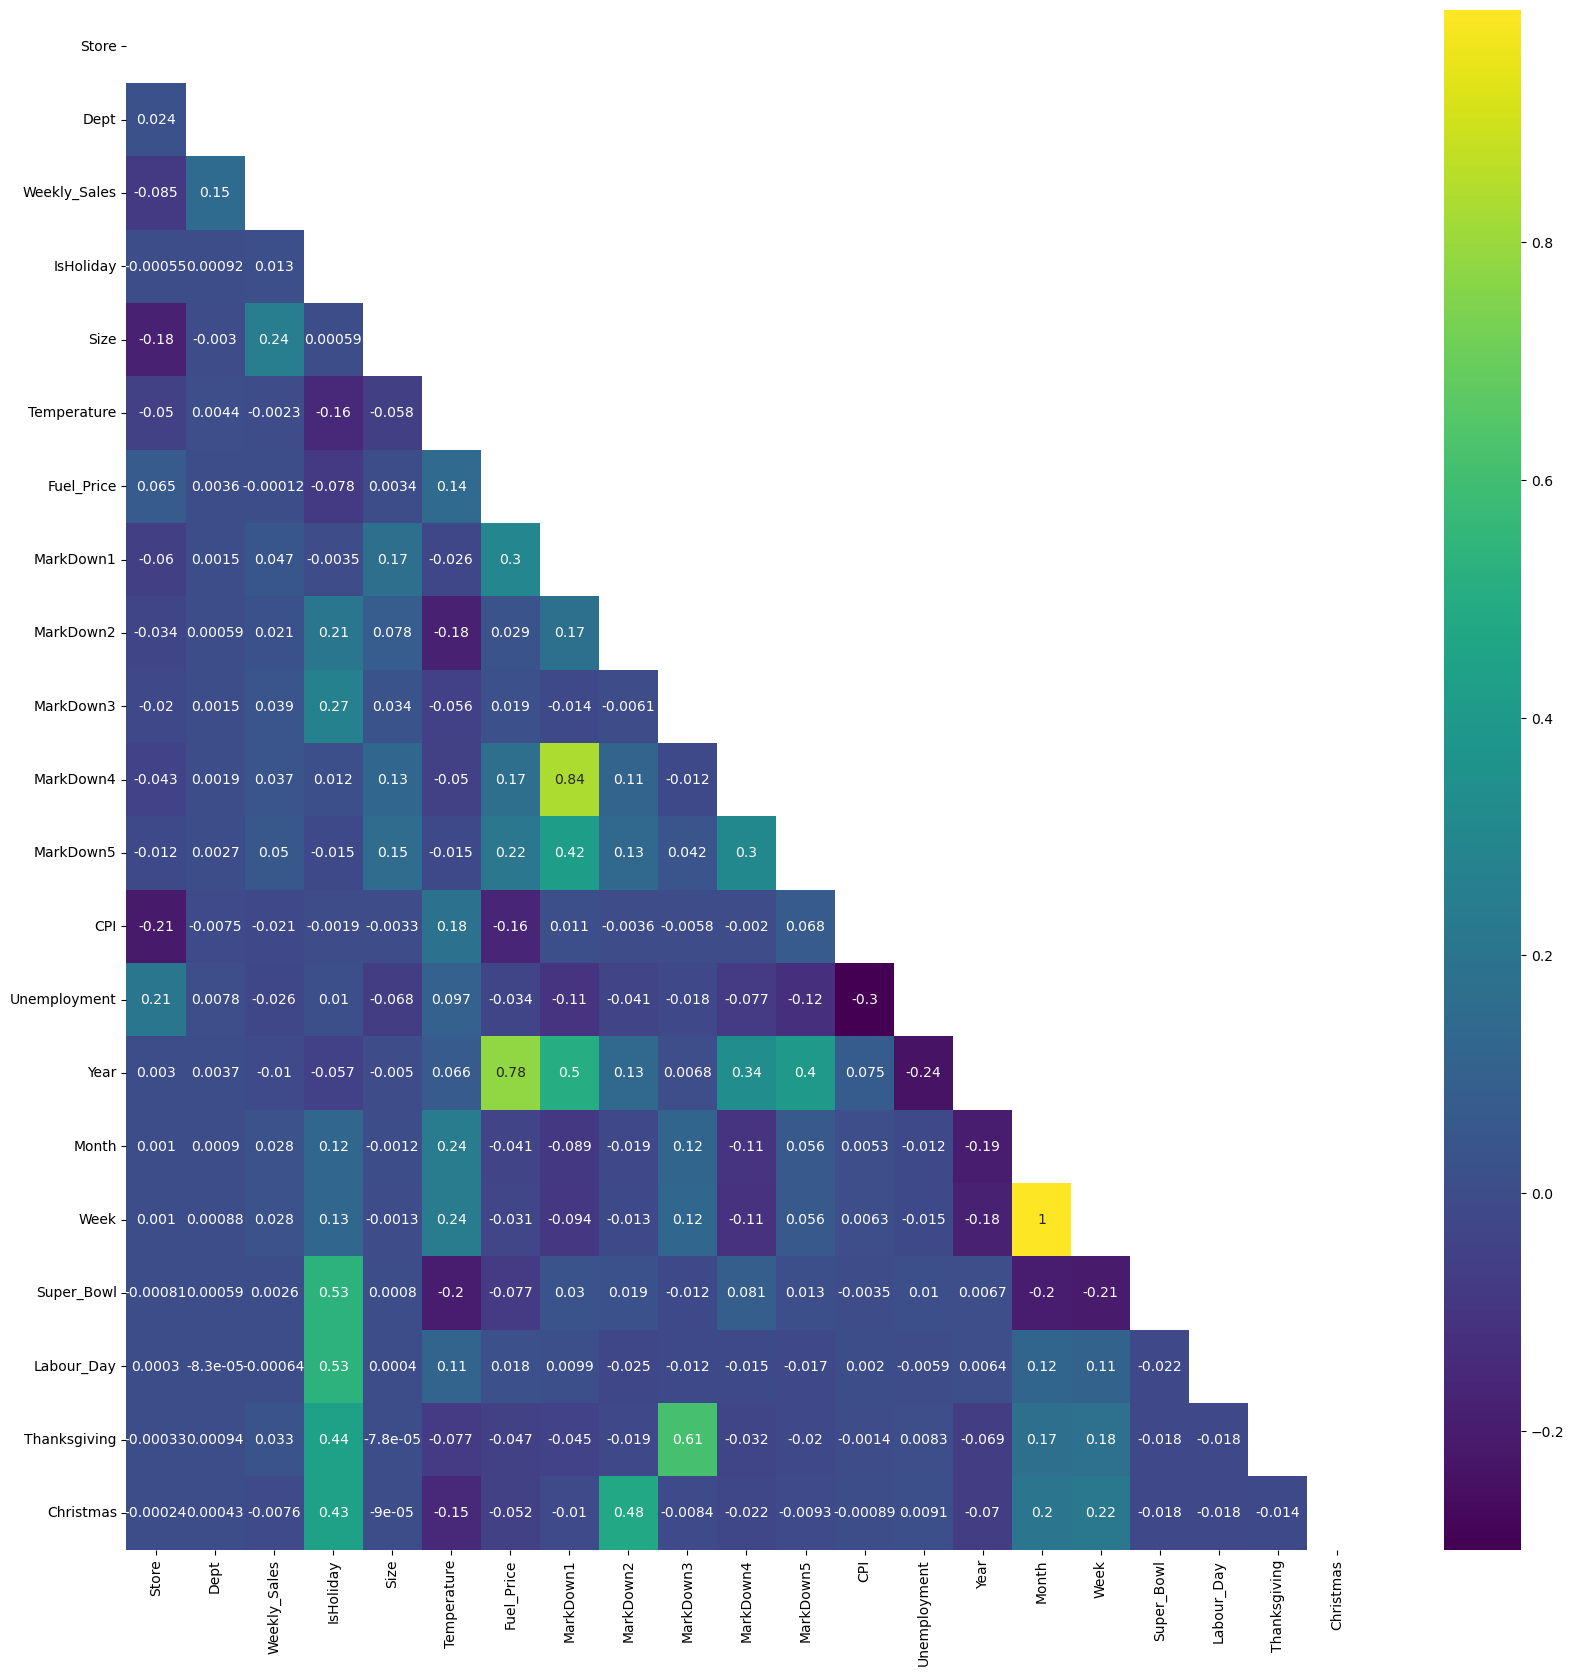

In [92]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot =True,mask=np.triu(df2.corr()+1),cmap ='viridis')

<AxesSubplot:>

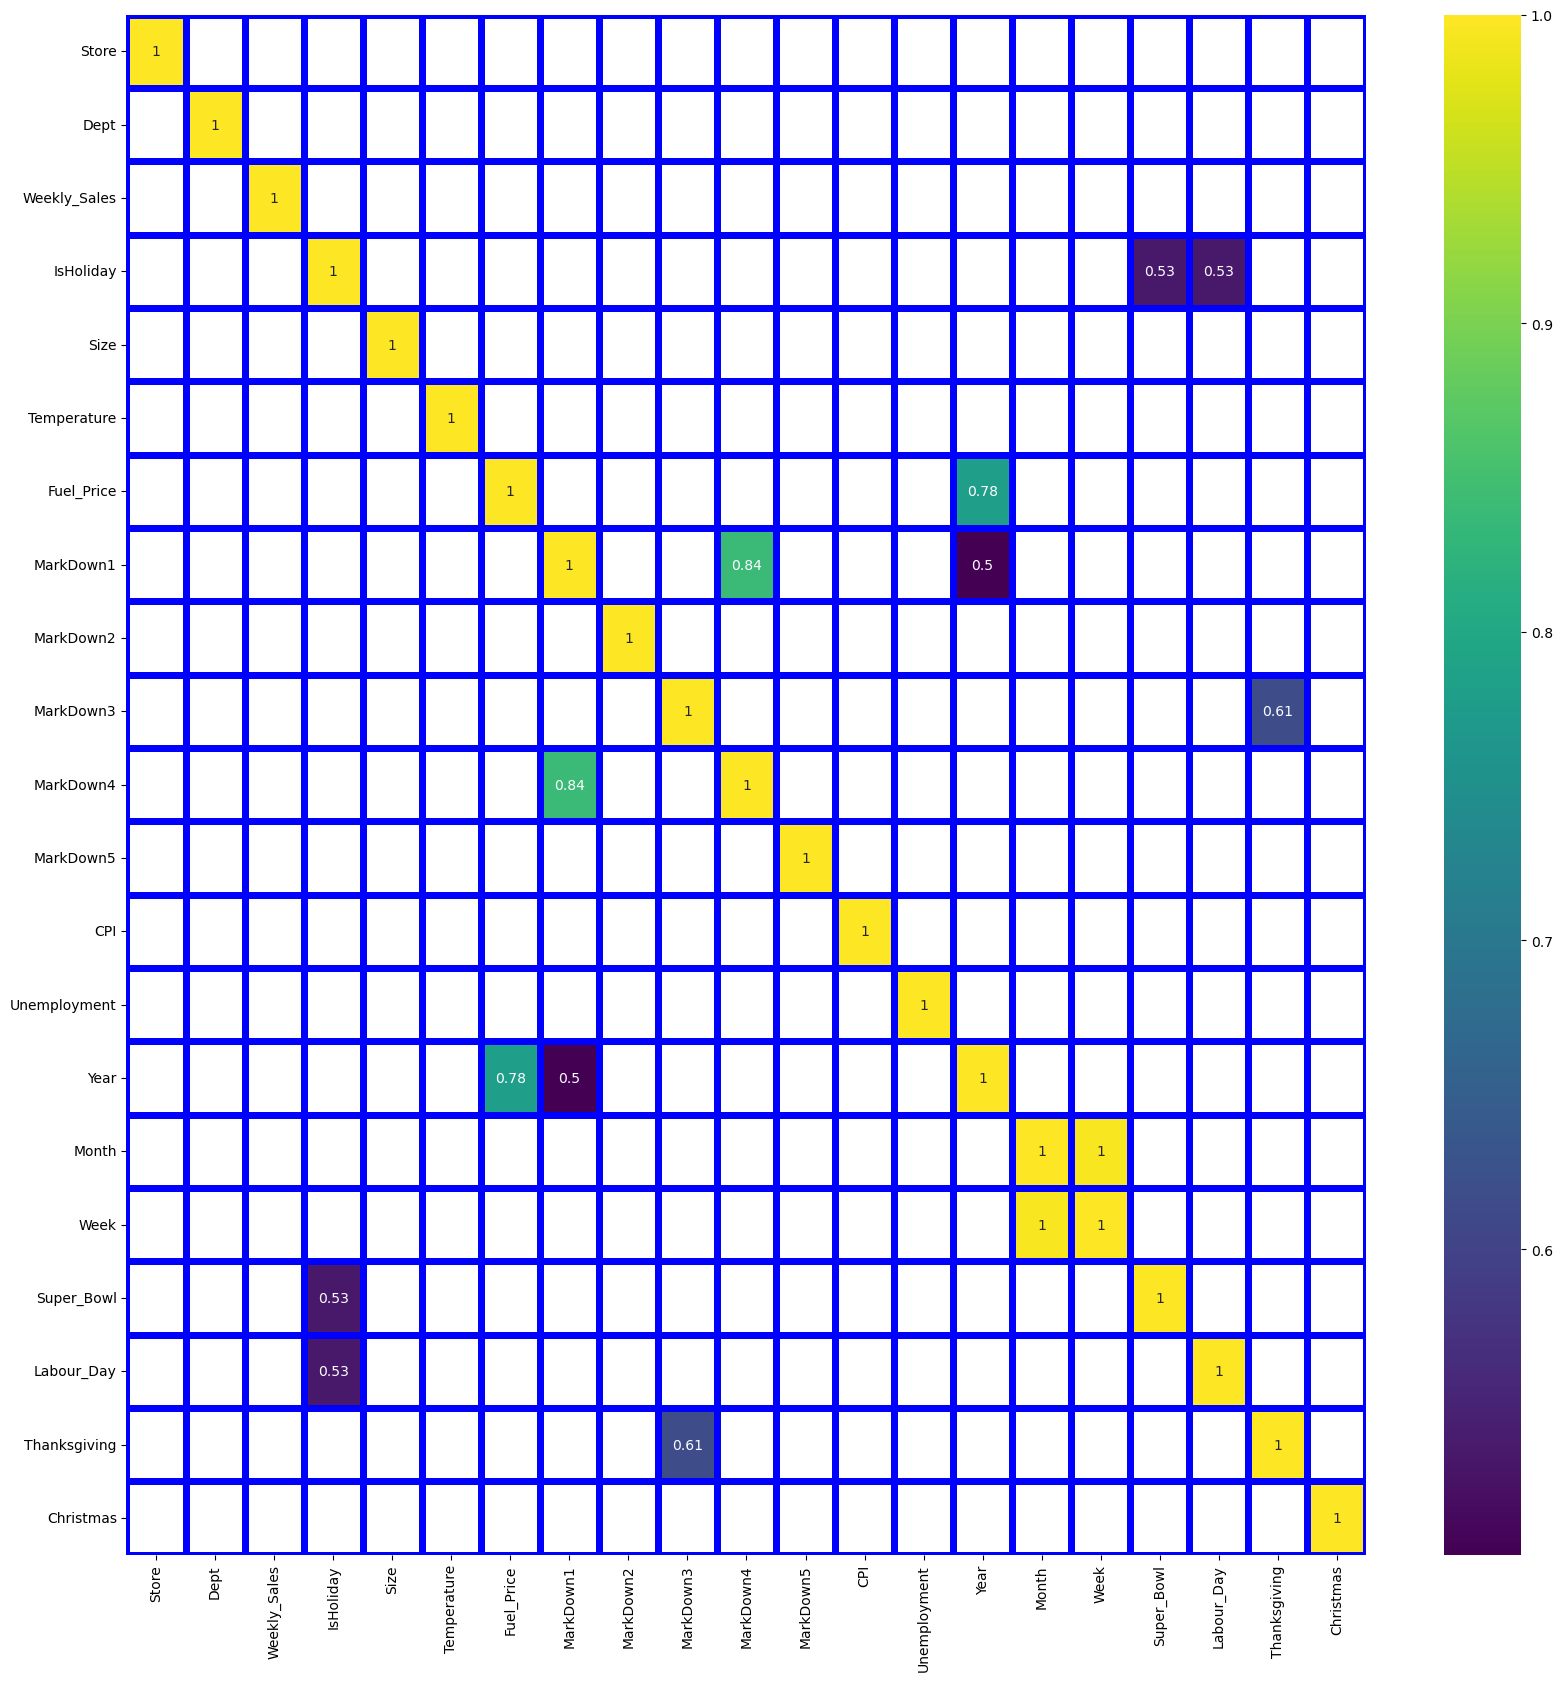

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr()[(df2.corr() < -.5) |(df2.corr() > .5)  ],annot =True,cmap ='viridis',linewidths=5,linecolor='blue')

In [94]:
# there is not much correlation between target and predictors there is multicolinearity between few variables

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

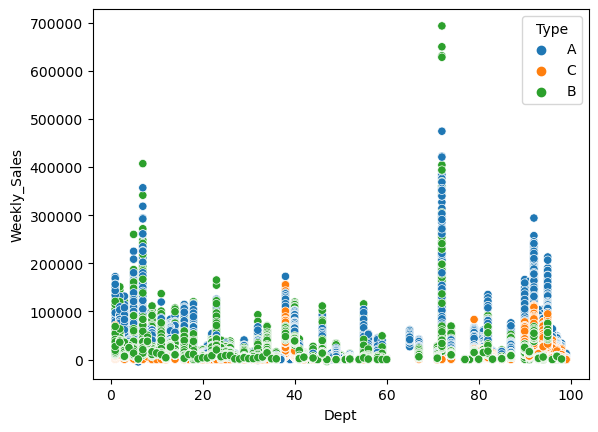

In [95]:
## sales by departments
sns.scatterplot(df2['Dept'],df2['Weekly_Sales'],hue =df2['Type'])
#low average sales are  in type c 
#also the 

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

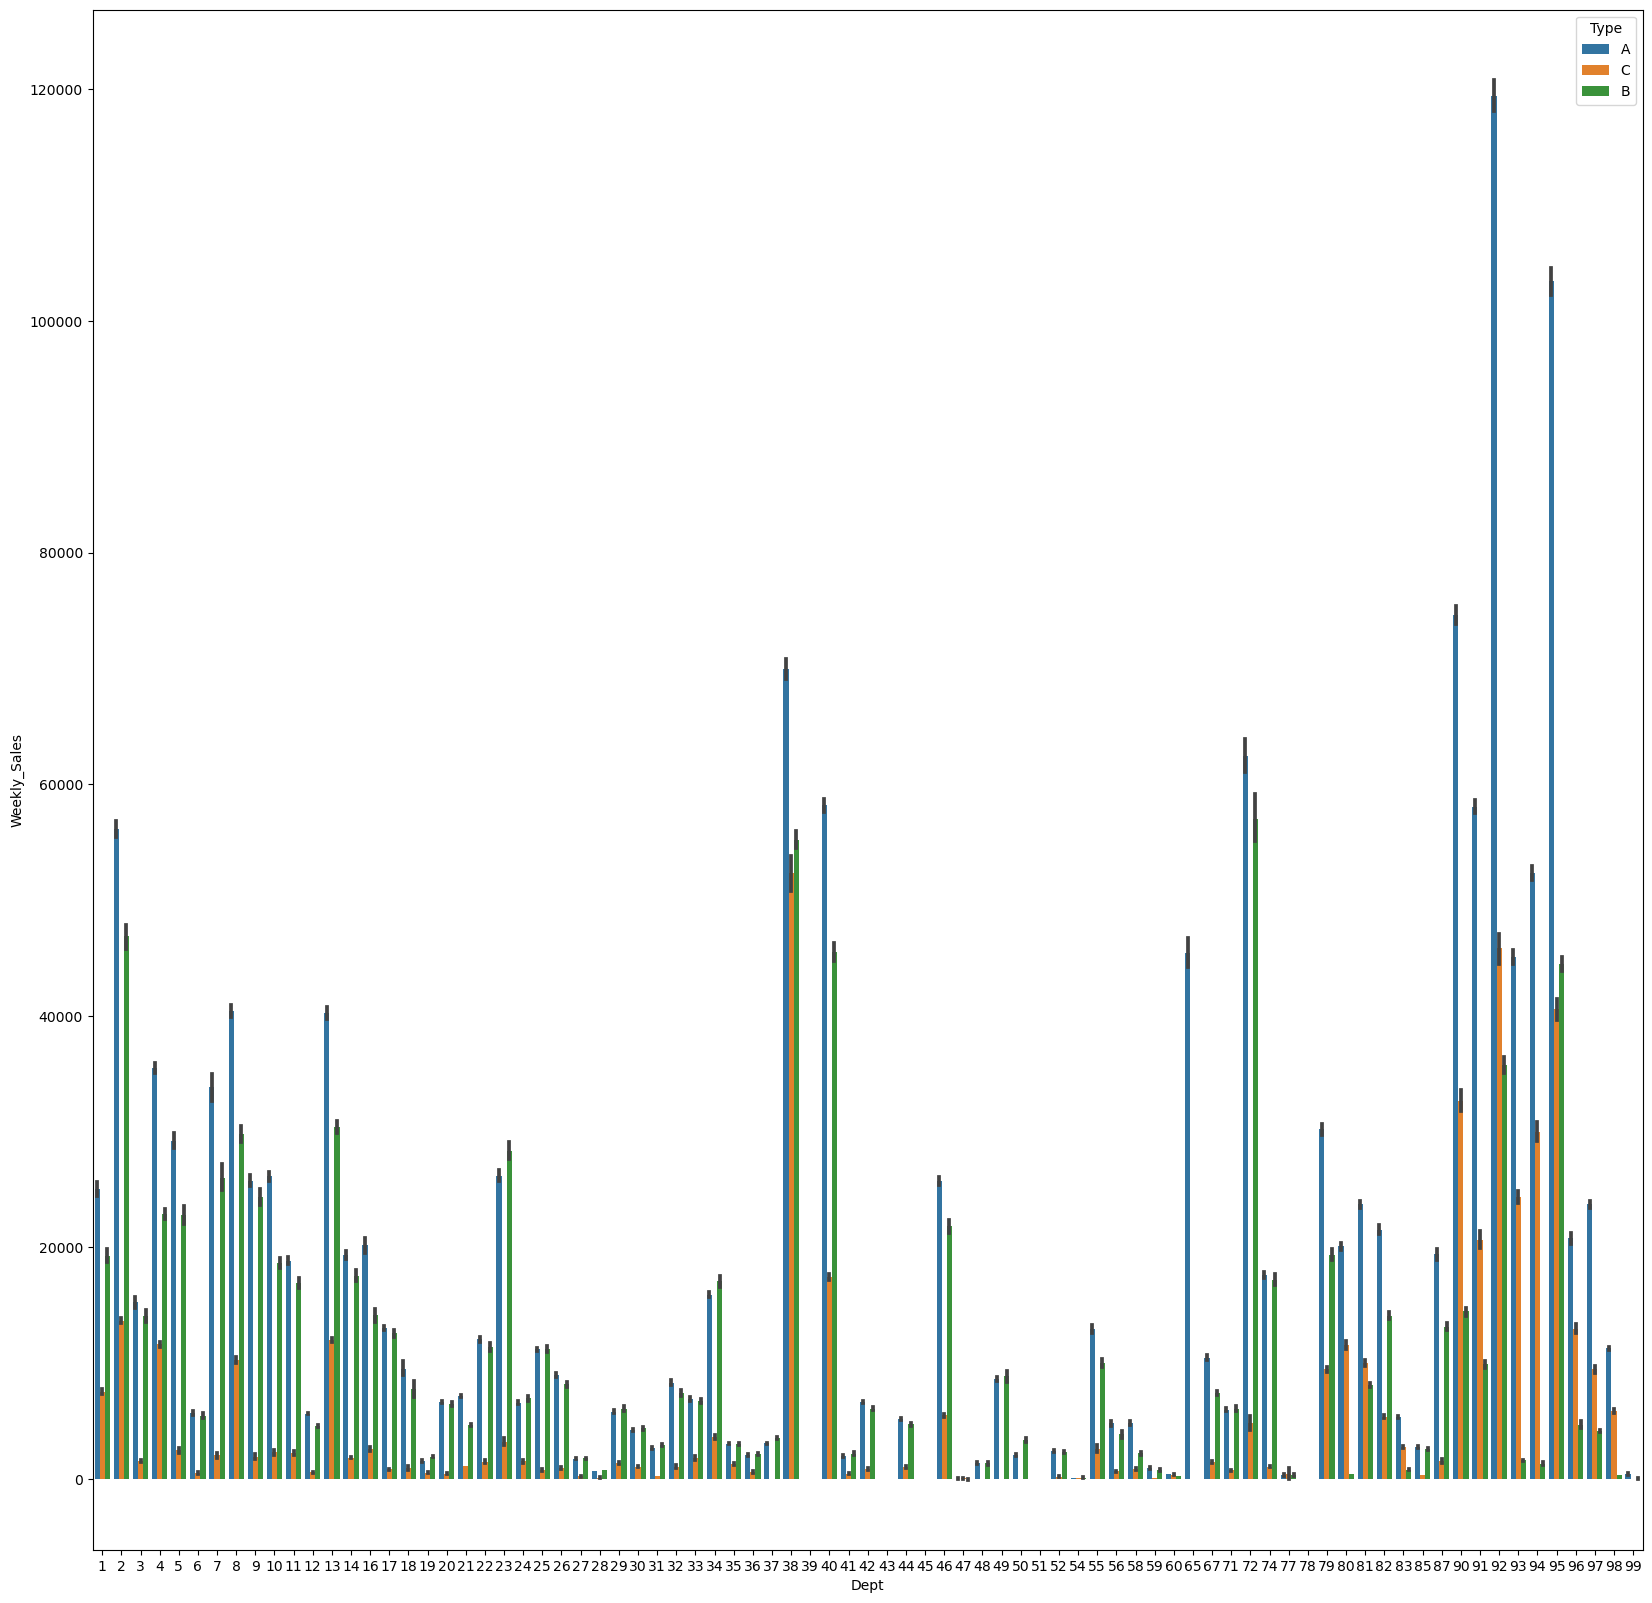

In [96]:
plt.figure(figsize=(20,20))
sns.barplot(df2['Dept'],df2['Weekly_Sales'],hue =df2['Type'])


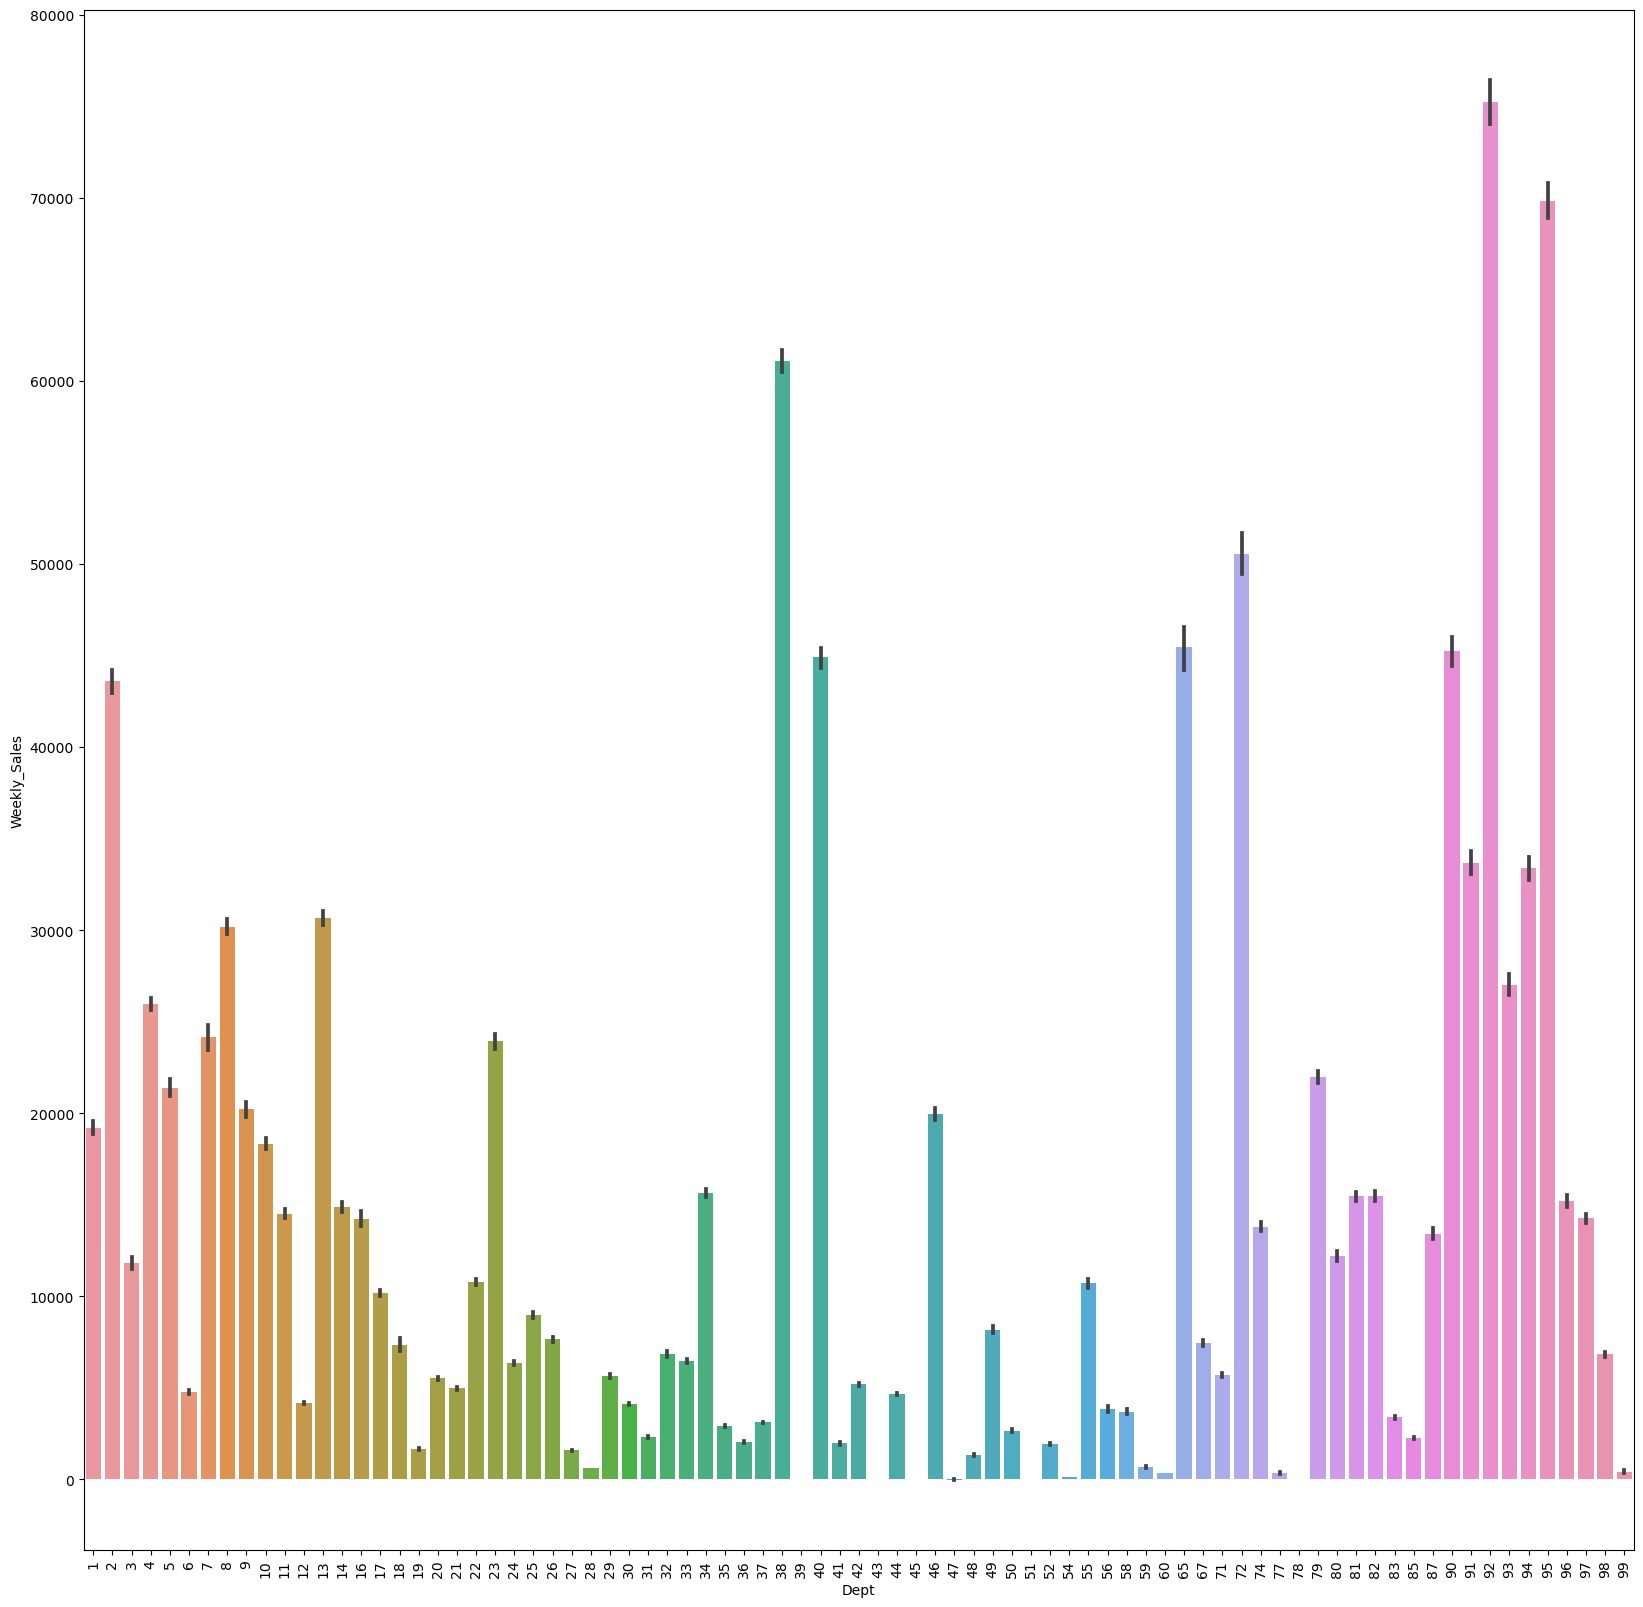

In [97]:
plt.figure(figsize=(20,20))
sns.barplot(df2['Dept'],df2['Weekly_Sales'])
plt.xticks(rotation ='vertical')
plt.show()
#dept 92 has the highest avg sales a for all the stores

In [98]:
# in scatterplot we can see that dep_60-80 has higher number of records for sales
# but when it comes to avg sales department 92 has the highest avg may be the observation in sctatterplot may due to seasonality

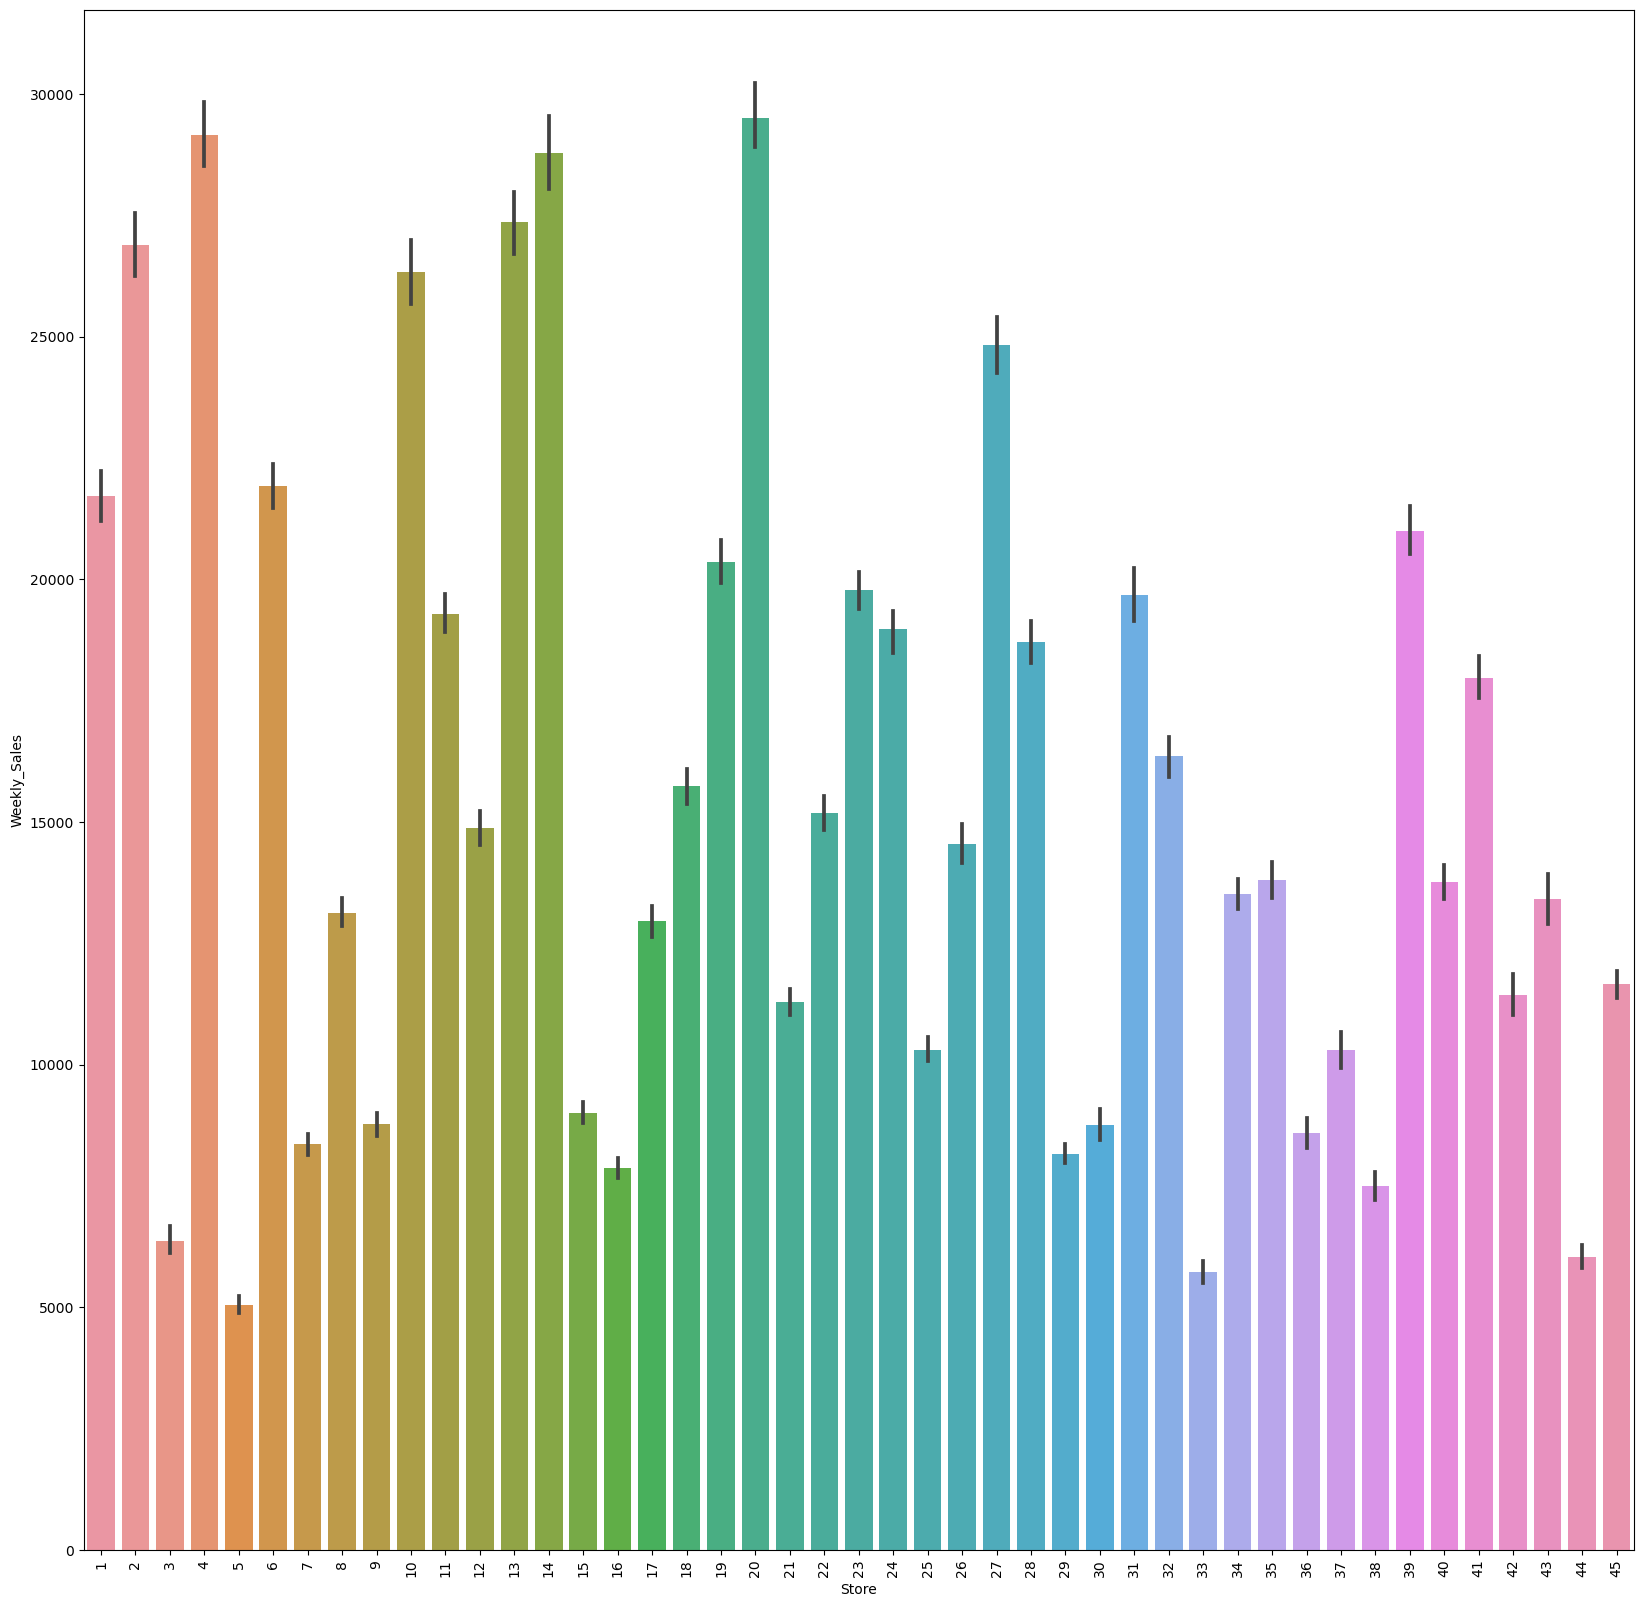

In [99]:
plt.figure(figsize=(20,20))
sns.barplot(df2['Store'],df2['Weekly_Sales'])
plt.xticks(rotation ='vertical')
plt.show()

In [100]:
# store number 4 has high average sales

In [101]:
df2.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     2 2010-02-05      50605.27      False    A  151315        42.31   
2      1     3 2010-02-05      13740.12      False    A  151315        42.31   
3      1     4 2010-02-05      39954.04      False    A  151315        42.31   
4      1     5 2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Year  Month  Week  Super_Bowl  Labour_Day  \
0  211.096358         8.106  2010      2     5       False       False   
1  211.096358         8.106  2010      2     5       False       False   
2  211.096358         8.106  2010      2     5       False       False   
3  211.096358         8.106  2010      2     5       False       False   
4  211.096358         8.106  2010      2     5       False       False   

   Thanksgiving  Christmas  
0         False      False  
1         False      False  
2         False      False  
3         False      False  
4         False      False

In [102]:
# now we try to get insights of sales based on the date types

In [103]:
df2.groupby('Year')['Weekly_Sales'].mean()

Year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

In [104]:
df2.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending =False)

Month
12    19355.702141
11    17491.031424
6     16326.137002
8     16062.516933
2     16008.779217
7     15861.419650
5     15776.337202
4     15650.338357
3     15416.657597
10    15243.855576
9     15095.886154
1     14126.075111
Name: Weekly_Sales, dtype: float64

In [105]:
df2.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending =False)

Week
51    26396.399283
47    22220.944538
50    20413.010012
49    18668.667017
22    16779.736413
27    16715.385450
48    16708.663027
14    16546.969569
23    16507.159463
7     16484.512808
6     16377.996441
31    16322.849347
26    16295.765416
24    16256.709574
18    16080.510071
45    16052.778819
44    16049.885484
33    16044.131296
21    16032.695133
5     16029.516788
34    15980.702973
32    15949.623069
25    15909.354806
36    15881.693339
9     15824.686123
35    15811.986003
40    15770.158050
28    15706.911428
13    15704.286702
16    15624.920952
46    15580.153946
19    15538.490635
10    15523.298473
29    15495.711972
20    15453.482419
11    15442.954556
15    15414.272778
43    15245.936566
42    15166.142319
8     15136.356574
30    15099.873722
41    15074.758403
12    14915.701094
1     14862.139543
17    14837.067571
37    14827.044248
52    14543.387158
38    14515.275571
39    14485.827993
3     14077.870442
2     14030.667886
4     13530.033667
Name: W

<AxesSubplot:xlabel='Month'>

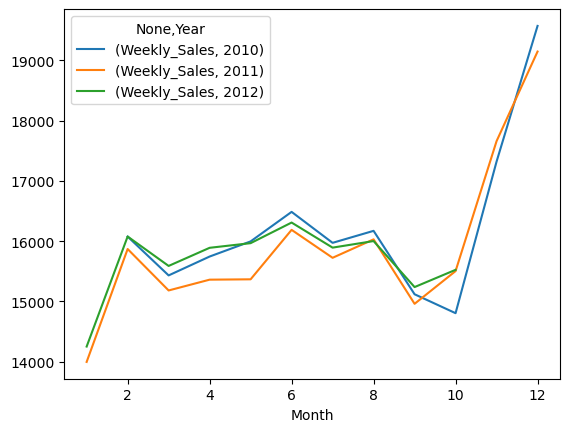

In [106]:
pd.pivot_table(data = df2,index= 'Month',columns ='Year',values = ['Weekly_Sales']).plot()

In [107]:
# we can see that 2010 has higher avg sales from 2 to 9 then from 10 to 12
# we can see that 2011 has a lower avgerage throughout the months
# the 2012 data has higher avg throughout the months but the data is only upto 10th month we can see the trend that sales would have been max for 12th month

<AxesSubplot:xlabel='Month'>

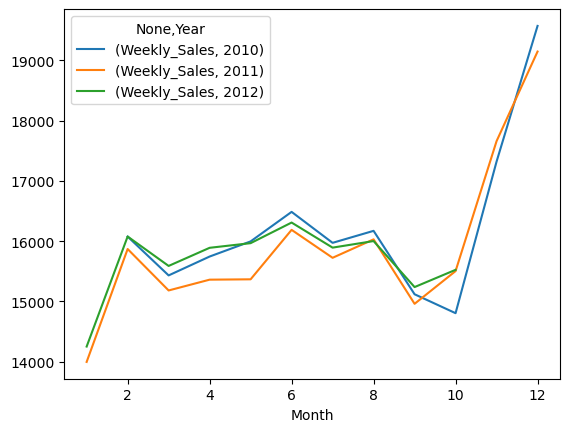

In [108]:
# we can observe that 
pd.pivot_table(data = df2,index= 'Month',columns ='Year',values = ['Weekly_Sales']).plot()

<AxesSubplot:xlabel='Week'>

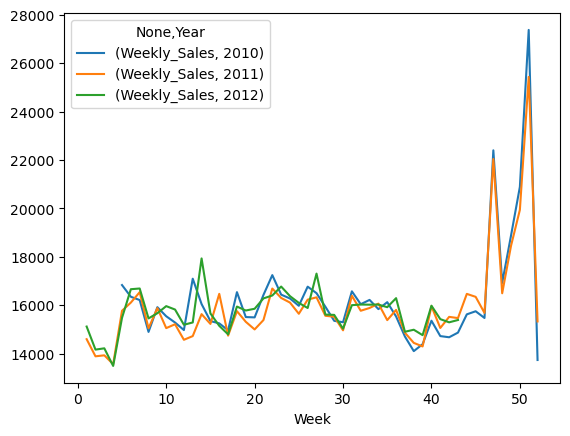

In [109]:
pd.pivot_table(data = df2,index= 'Week',columns ='Year',values = ['Weekly_Sales']).plot()

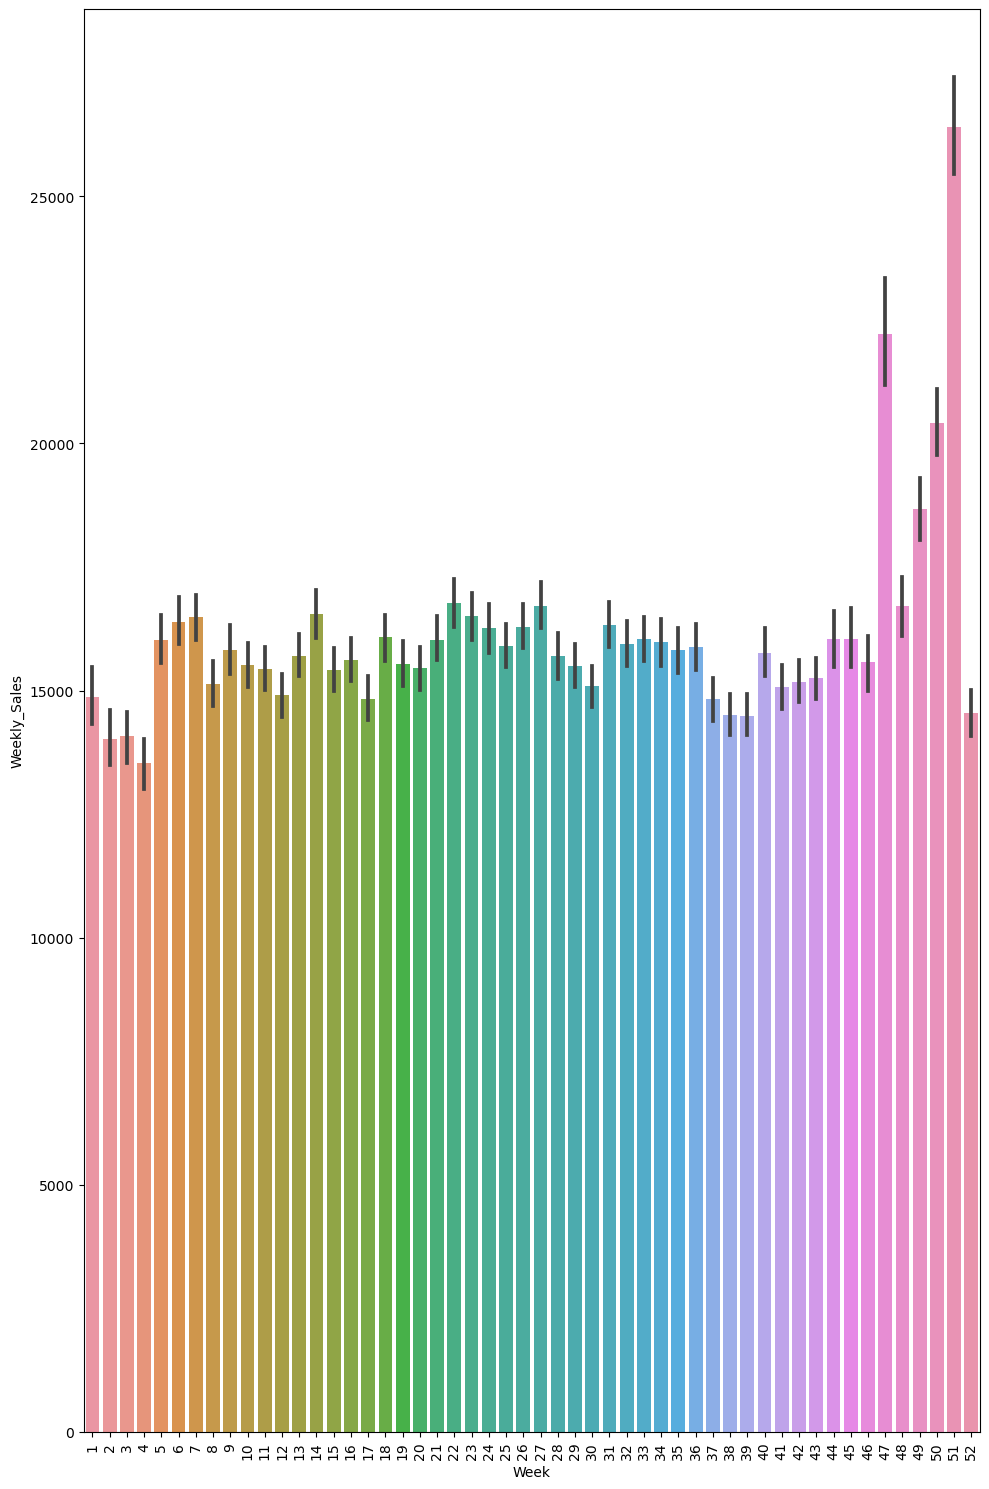

In [110]:
plt.figure(figsize=(10,15))
sns.barplot(x =  df2['Week'], y = df2['Weekly_Sales'])
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

In [111]:
df1.head(1)

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05       24924.5      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Year  Month  Week  Super_Bowl  Labour_Day  \
0  211.096358         8.106  2010      2     5       False       False   

   Thanksgiving  Christmas  
0         False      False

In [112]:
# relation between sales CPI,Unemployment,Temperature,Fuel_Price

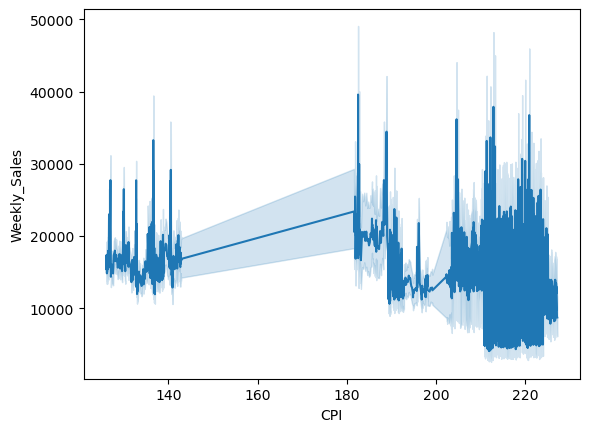

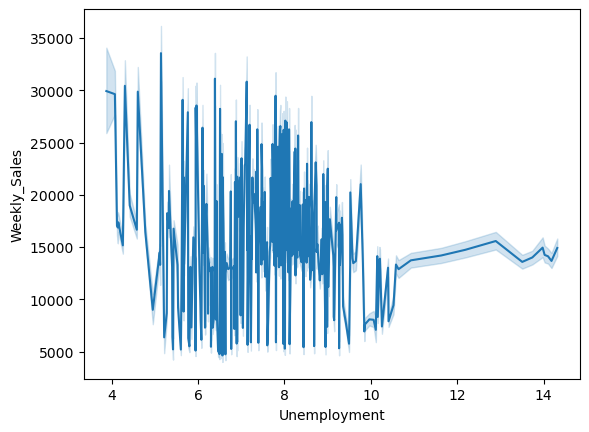

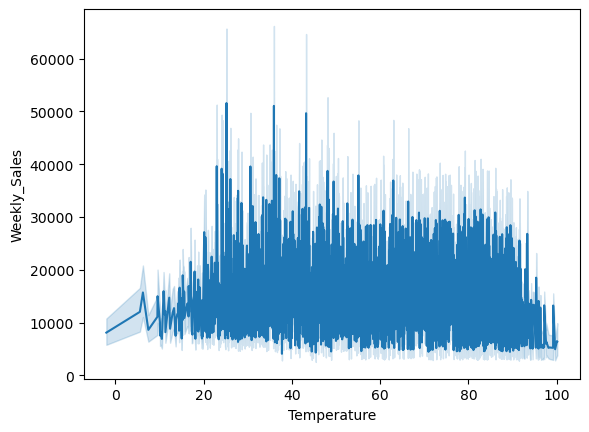

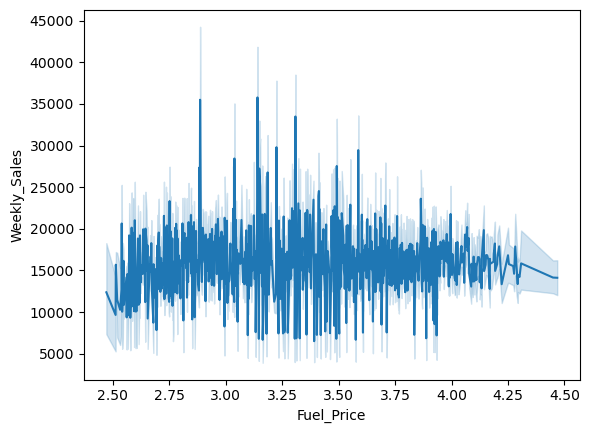

In [113]:
for i in ['CPI','Unemployment','Temperature','Fuel_Price']:
    sns.lineplot(df2[i],df2['Weekly_Sales'])
    plt.show()

In [114]:
# there is no values for cpi in range  140 to 180
# no patterns or trend can be observed here 

In [115]:
(df2[(df2.select_dtypes(include ='number') < 0).any(axis =1)].shape[0]/df2.shape[0])*100

0.6902768223545319

In [116]:
df2[(df2['Weekly_Sales']< 0)]

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
188         1    47 2010-02-19       -863.00      False    A  151315   
406         1    47 2010-03-12       -698.00      False    A  151315   
2549        1    47 2010-10-08        -58.00      False    A  151315   
3632        1    54 2011-01-21        -50.00      False    A  151315   
4419        1    47 2011-04-08       -298.00      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
419999     45    49 2012-05-18         -3.97      False    B  118221   
420066     45    49 2012-05-25         -4.97      False    B  118221   
420403     45    49 2012-06-29        -34.00      False    B  118221   
420736     45    49 2012-08-03         -1.91      False    B  118221   
421142     45    49 2012-09-14         -6.83      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
188           39.93       2.514       0.00       0.00       0.00       0.00   
406           57.79       2.667       0.00       0.00       0.00       0.00   
2549          63.93       2.633       0.00       0.00       0.00       0.00   
3632          44.04       3.016       0.00       0.00       0.00       0.00   
4419          67.84       3.622       0.00       0.00       0.00       0.00   
...             ...         ...        ...        ...        ...        ...   
419999        66.30       3.848    6813.74       0.00      13.86     936.49   
420066        67.21       3.798    5370.39       0.00     361.22    1287.62   
420403        75.22       3.506    3291.36     425.60       0.00     314.88   
420736        76.58       3.654   24853.05      39.56      17.96   11142.69   
421142        67.87       3.948   11407.95       0.00       4.30    3421.72   

        MarkDown5         CPI  Unemployment  Year  Month  Week  Super_Bowl  \
188          0.00  211.289143         8.106  2010      2     7       False   
406          0.00  211.380643         8.106  2010      3    10       False   
2549         0.00  211.746754         7.838  2010     10    40       False   
3632         0.00  211.827234         7.742  2011      1     3       False   
4419         0.00  215.074394         7.682  2011      4    14       False   
...           ...         ...           ...   ...    ...   ...         ...   
419999    2941.55  190.996448         8.567  2012      5    20       False   
420066    2461.81  191.002810         8.567  2012      5    21       False   
420403    2255.34  191.099246         8.567  2012      6    26       False   
420736    2768.32  191.164090         8.684  2012      8    31       False   
421142    5268.92  191.699850         8.684  2012      9    37       False   

        Labour_Day  Thanksgiving  Christmas  
188          False         False      False  
406          False         False      False  
2549         False         False      False  
3632         False         False      False  
4419         False         False      False  
...            ...           ...        ...  
419999       False         False      False  
420066       False         False      False  
420403       False         False      False  
420736       False         False      False  
421142       False         False      False  

[1285 rows x 23 columns]

In [117]:
(850/(df2.shape[0]))*100

0.20162725051592856

In [118]:
df2.shape

(421570, 23)

there are -ve values in sales since the occurance of those are very less (0.3%)
since the other featuters cannot contribute to the this -ve value otherwise we colud have seen more -ve values
and for prediction of future sales this might cause imbalance 
we can either remove these or assign zero value
if we  try to treat them by giving zero value it could inturn create new patterns
since these values are less than 0.30 % we will consider removing them

In [119]:
 df3 = df2[~(df2['Weekly_Sales']< 0)]

In [ ]:
from scipy

In [ ]:
iv=[]
from scipy.stats import jarque_bera
from scipy.stats import levene
for i in df_hotel.select_dtypes('number').drop('is_canceled',axis=1).columns:
    if jarque_bera(df_hotel[i])[1]<0.05:
        if levene(df_hotel[i],df_hotel['is_canceled'])[1]<0.05:
            if ttest_ind(df_hotel[i],df_hotel['is_canceled'])[1]>0.05:
                iv.append(i)
        else:
            if mannwhitneyu(df_hotel[i],df_hotel['is_canceled'])[0]>0.05:
                iv.append(i)
    else:
        if mannwhitneyu(df_hotel[i],df_hotel['is_canceled'])[0]>0.05:
            iv.append(i)

In [ ]:
from scipy.stats import levene,shapiro,pear

df3.to_csv('Processed_Train_Data',index=False)

# Findings and Expolartions

In [121]:
df2.isna().sum().sum()
#there are no missing values
# the missing values for markdown has been assigned 0  value since its mentioned data is not available
# the outliers in Size has been reassigned to Type C
#the weekly_sales contain negative values 
#

0

Explorations & Findings

There are 45 stores and 81 department in data. Departments are not same in all stores.

Although department 72 has higher weekly sales values, on average department 92 is the best. It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time.

Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales.

Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.

As expected, holiday average sales are higher than normal dates.

Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.

Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.

It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.

January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.

CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

In [122]:
df3 = pd.read_csv('Processed_Train_Data')

In [123]:
df3

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1  2010-02-05      24924.50      False    A  151315   
1           1     2  2010-02-05      50605.27      False    A  151315   
2           1     3  2010-02-05      13740.12      False    A  151315   
3           1     4  2010-02-05      39954.04      False    A  151315   
4           1     5  2010-02-05      32229.38      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
420280     45    93  2012-10-26       2487.80      False    B  118221   
420281     45    94  2012-10-26       5203.31      False    B  118221   
420282     45    95  2012-10-26      56017.47      False    B  118221   
420283     45    97  2012-10-26       6817.48      False    B  118221   
420284     45    98  2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00        0.0       0.00   
1             42.31       2.572       0.00       0.00        0.0       0.00   
2             42.31       2.572       0.00       0.00        0.0       0.00   
3             42.31       2.572       0.00       0.00        0.0       0.00   
4             42.31       2.572       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
420280        58.85       3.882    4018.91      58.08      100.0     211.94   
420281        58.85       3.882    4018.91      58.08      100.0     211.94   
420282        58.85       3.882    4018.91      58.08      100.0     211.94   
420283        58.85       3.882    4018.91      58.08      100.0     211.94   
420284        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Week  Super_Bowl  \
0            0.00  211.096358         8.106  2010      2     5       False   
1            0.00  211.096358         8.106  2010      2     5       False   
2            0.00  211.096358         8.106  2010      2     5       False   
3            0.00  211.096358         8.106  2010      2     5       False   
4            0.00  211.096358         8.106  2010      2     5       False   
...           ...         ...           ...   ...    ...   ...         ...   
420280     858.33  192.308899         8.667  2012     10    43       False   
420281     858.33  192.308899         8.667  2012     10    43       False   
420282     858.33  192.308899         8.667  2012     10    43       False   
420283     858.33  192.308899         8.667  2012     10    43       False   
420284     858.33  192.308899         8.667  2012     10    43       False   

        Labour_Day  Thanksgiving  Christmas  
0            False         False      False  
1            False         False      False  
2            False         False      False  
3            False         False      False  
4            False         False      False  
...            ...           ...        ...  
420280       False         False      False  
420281       False         False      False  
420282       False         False      False  
420283       False         False      False  
420284       False         False      False  

[420285 rows x 23 columns]

In [124]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  bool   
 5   Type          420285 non-null  object 
 6   Size          420285 non-null  int64  
 7   Temperature   420285 non-null  float64
 8   Fuel_Price    420285 non-null  float64
 9   MarkDown1     420285 non-null  float64
 10  MarkDown2     420285 non-null  float64
 11  MarkDown3     420285 non-null  float64
 12  MarkDown4     420285 non-null  float64
 13  MarkDown5     420285 non-null  float64
 14  CPI           420285 non-null  float64
 15  Unemployment  420285 non-null  float64
 16  Year          420285 non-null  int64  
 17  Month         420285 non-null  int64  
 18  Week

In [125]:
df3

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1  2010-02-05      24924.50      False    A  151315   
1           1     2  2010-02-05      50605.27      False    A  151315   
2           1     3  2010-02-05      13740.12      False    A  151315   
3           1     4  2010-02-05      39954.04      False    A  151315   
4           1     5  2010-02-05      32229.38      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
420280     45    93  2012-10-26       2487.80      False    B  118221   
420281     45    94  2012-10-26       5203.31      False    B  118221   
420282     45    95  2012-10-26      56017.47      False    B  118221   
420283     45    97  2012-10-26       6817.48      False    B  118221   
420284     45    98  2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00        0.0       0.00   
1             42.31       2.572       0.00       0.00        0.0       0.00   
2             42.31       2.572       0.00       0.00        0.0       0.00   
3             42.31       2.572       0.00       0.00        0.0       0.00   
4             42.31       2.572       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
420280        58.85       3.882    4018.91      58.08      100.0     211.94   
420281        58.85       3.882    4018.91      58.08      100.0     211.94   
420282        58.85       3.882    4018.91      58.08      100.0     211.94   
420283        58.85       3.882    4018.91      58.08      100.0     211.94   
420284        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Week  Super_Bowl  \
0            0.00  211.096358         8.106  2010      2     5       False   
1            0.00  211.096358         8.106  2010      2     5       False   
2            0.00  211.096358         8.106  2010      2     5       False   
3            0.00  211.096358         8.106  2010      2     5       False   
4            0.00  211.096358         8.106  2010      2     5       False   
...           ...         ...           ...   ...    ...   ...         ...   
420280     858.33  192.308899         8.667  2012     10    43       False   
420281     858.33  192.308899         8.667  2012     10    43       False   
420282     858.33  192.308899         8.667  2012     10    43       False   
420283     858.33  192.308899         8.667  2012     10    43       False   
420284     858.33  192.308899         8.667  2012     10    43       False   

        Labour_Day  Thanksgiving  Christmas  
0            False         False      False  
1            False         False      False  
2            False         False      False  
3            False         False      False  
4            False         False      False  
...            ...           ...        ...  
420280       False         False      False  
420281       False         False      False  
420282       False         False      False  
420283       False         False      False  
420284       False         False      False  

[420285 rows x 23 columns]

In [126]:
#since our relationship between the target and predictor variables are complex 
#and our target variable is skewed we will go for non parametric methods

<AxesSubplot:>

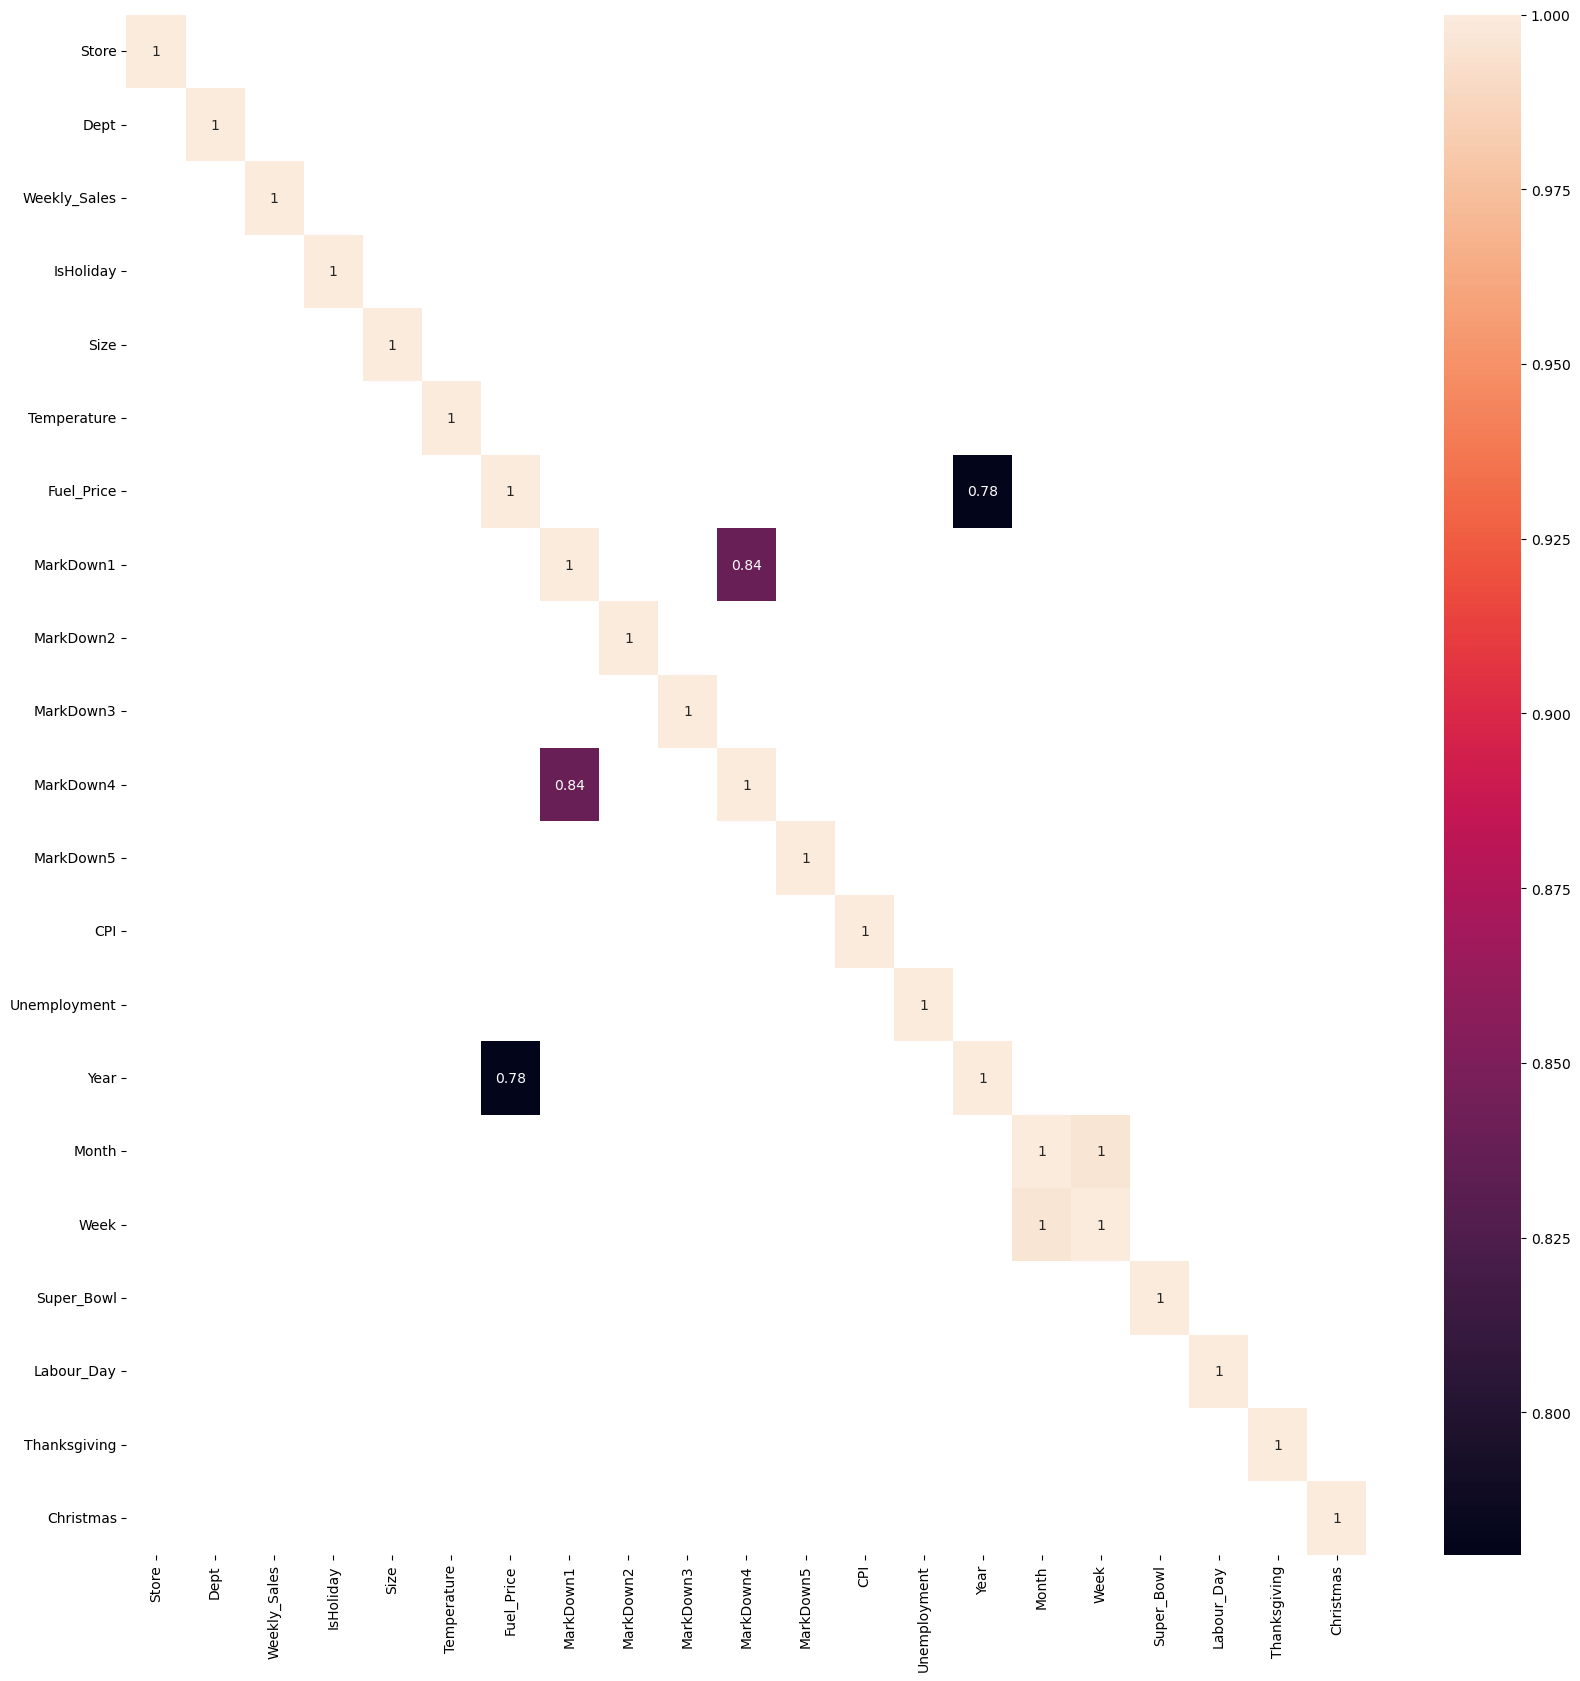

In [127]:
plt.figure( figsize=(20,20))
sns.heatmap(df3.corr()[(df3.corr() <-.65)|(df3.corr() >.65) ],annot=True)

we will convert categorical data into  encoded versions

we will keep the store and other discrete variable as it is since we are focussing non parametric methods

In [128]:
df4 = df3.copy()

In [129]:
for i in ['Super_Bowl','Labour_Day','Thanksgiving','Christmas','IsHoliday']:
    df4[i] = df4[i].astype(int)

# one hot encoding for TYpe


In [130]:
df4 = pd.get_dummies(data = df4,columns =['Type'],drop_first=True)

df4['Type'] = df4['Type'].replace(to_replace=['A','B','C'] ,value=[1,2,3])

In [131]:
df4


Store  Dept        Date  Weekly_Sales  IsHoliday    Size  Temperature  \
0           1     1  2010-02-05      24924.50          0  151315        42.31   
1           1     2  2010-02-05      50605.27          0  151315        42.31   
2           1     3  2010-02-05      13740.12          0  151315        42.31   
3           1     4  2010-02-05      39954.04          0  151315        42.31   
4           1     5  2010-02-05      32229.38          0  151315        42.31   
...       ...   ...         ...           ...        ...     ...          ...   
420280     45    93  2012-10-26       2487.80          0  118221        58.85   
420281     45    94  2012-10-26       5203.31          0  118221        58.85   
420282     45    95  2012-10-26      56017.47          0  118221        58.85   
420283     45    97  2012-10-26       6817.48          0  118221        58.85   
420284     45    98  2012-10-26       1076.80          0  118221        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00        0.0       0.00       0.00   
1            2.572       0.00       0.00        0.0       0.00       0.00   
2            2.572       0.00       0.00        0.0       0.00       0.00   
3            2.572       0.00       0.00        0.0       0.00       0.00   
4            2.572       0.00       0.00        0.0       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
420280       3.882    4018.91      58.08      100.0     211.94     858.33   
420281       3.882    4018.91      58.08      100.0     211.94     858.33   
420282       3.882    4018.91      58.08      100.0     211.94     858.33   
420283       3.882    4018.91      58.08      100.0     211.94     858.33   
420284       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment  Year  Month  Week  Super_Bowl  Labour_Day  \
0       211.096358         8.106  2010      2     5           0           0   
1       211.096358         8.106  2010      2     5           0           0   
2       211.096358         8.106  2010      2     5           0           0   
3       211.096358         8.106  2010      2     5           0           0   
4       211.096358         8.106  2010      2     5           0           0   
...            ...           ...   ...    ...   ...         ...         ...   
420280  192.308899         8.667  2012     10    43           0           0   
420281  192.308899         8.667  2012     10    43           0           0   
420282  192.308899         8.667  2012     10    43           0           0   
420283  192.308899         8.667  2012     10    43           0           0   
420284  192.308899         8.667  2012     10    43           0           0   

        Thanksgiving  Christmas  Type_B  Type_C  
0                  0          0       0       0  
1                  0          0       0       0  
2                  0          0       0       0  
3                  0          0       0       0  
4                  0          0       0       0  
...              ...        ...     ...     ...  
420280             0          0       1       0  
420281             0          0       1       0  
420282             0          0       1       0  
420283             0          0       1       0  
420284             0          0       1       0  

[420285 rows x 24 columns]

since we have splitted the date into week,month etc, we will drop the date column

also we will try the model with all holiday columns and with is_holiday and without is_holiday

In [133]:
from scipy.stats import spearmanr
from scipy.stats import jarque_bera


In [137]:
df3.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Week', 'Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

Null Hypothesis :  Data is Normal (p_value > 0.05)
Alternate Hypothesis : Data is not Normal (p_value < 0.05)

In [141]:
for i in ['Size','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment','Year']:
    t,p_val = jarque_bera(df3[i])
    if p_val > 0.05:
        print(f'feature {i} feature is normal')
    else:
        print(f'feature {i} feature is not  normal')
    
    

feature Size feature is not  normal
feature Temperature feature is not  normal
feature Fuel_Price feature is not  normal
feature MarkDown1 feature is not  normal
feature MarkDown2 feature is not  normal
feature MarkDown3 feature is not  normal
feature MarkDown4 feature is not  normal
feature MarkDown5 feature is not  normal
feature CPI feature is not  normal
feature Unemployment feature is not  normal
feature Year feature is not  normal


In [138]:
# since none of our numerical columns  


SignificanceResult(statistic=2303072.9798479057, pvalue=0.0)

In [151]:
for i in ['Size','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment','Year','Month','Week','Year']:
    s,p  = spearmanr(df3['Weekly_Sales'],df3[i])
    if p > 0.05:
        print(f' feature {i} has no correlation with target')
    else:
        print(f' feature {i} has correlation with target')

 feature Size has correlation with target
 feature Temperature has correlation with target
 feature Fuel_Price has no correlation with target
 feature MarkDown1 has correlation with target
 feature MarkDown2 has correlation with target
 feature MarkDown3 has correlation with target
 feature MarkDown4 has correlation with target
 feature MarkDown5 has correlation with target
 feature CPI has correlation with target
 feature Unemployment has correlation with target
 feature Year has correlation with target
 feature Month has correlation with target
 feature Week has correlation with target
 feature Year has correlation with target


In [144]:
df['Weekly_Sales'].corr(df['Fuel_Price'])



-0.00012029554499577076

In [145]:
## for categorical column we will go by anova or kruskal 

In [147]:
df3.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Week', 'Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

In [152]:
# since our target is not normal we will go for non parametric test 

In [163]:
from scipy.stats import kruskal

In [ ]:
Null Hypothesis (H0): There is no significant difference among the groups.

Alternative Hypothesis (Ha): At least one group is different from the others.
    
if alternate is true we can say that feature and target are dependent 

In [227]:
for i in ['Store', 'Dept','IsHoliday', 'Type','Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas']:
    a = []
    for j in df3[i].unique():
       

        x = df3[df3[i] ==j]['Weekly_Sales']
    
        a.append(x)
    s,p = (kruskal(*a))
    if p < 0.05:
        
        print(f'the feature  {i} is dependent on the target ')
    else:
        print(f'the feature  {i} is not dependent on the target ')




the feature  Store is dependent on the target 
the feature  Dept is dependent on the target 
the feature  IsHoliday is dependent on the target 
the feature  Type is dependent on the target 
the feature  Super_Bowl is not dependent on the target 
the feature  Labour_Day is not dependent on the target 
the feature  Thanksgiving is dependent on the target 
the feature  Christmas is dependent on the target 


In [229]:
# superbowl and thanksgiving are insginficant by statistical test 
#but we will consider all the fetaures for model building and do feature importances